In [2]:
# """
# predicting a sequence of future prices (`n_steps_out`) instead of just one.

# Benefits of This Approach
# Utilizes Temporal Patterns: The model learns dependencies across multiple future time steps.
# More Robust Predictions: Predicting a sequence captures trends better than single-step predictions.
# Real-World Applicability: Multi-step forecasting is closer to real-world use cases, such as portfolio management.
# """

In [3]:
!pip install ta==0.10.2
!pip install yfinance
!pip install ipython-autotime

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=2f205aa8fa9b2b7fb5db61e67b3e3fac34b811cb2392e88ba29719c578963580
  Stored in directory: /root/.cache/pip/wheels/dd/a5/1b/04c9ab22e30c7d2c1810f0441356918ff458b493b4efaf5249
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 23.9 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 80.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 60.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138965 sha256=4afb4700b06da1a21964b6cee63bfd1ae1f65854121c3c244

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import ta
import math
import json
from joblib import Parallel, delayed

from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense, Dropout, BatchNormalization, Reshape, Flatten, Bidirectional, LSTM
from keras.models import Model, Sequential
from keras.optimizers import Adam
%matplotlib inline
%load_ext autotime
print("tensorflow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

tensorflow version: 2.15.0
Num GPUs Available:  1


2024-11-18 03:58:17.644824: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 03:58:17.837284: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 03:58:17.837657: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

True

time: 225 ms (started: 2024-11-18 03:58:17 +00:00)


In [5]:
# Download historical price data for a stock
tickers = ['AAPL', 'AMZN', 'GME', 'GOOGL', 'NFLX', 'TSLA', 'MSFT', 'NVDA', 'AMD', 'CRM', 'JPM', 'V', 'MA', 'MSTR', 'DIS', 'BA', 'XOM', 'ORCL', 'META']
print(len(tickers))
df = [yf.download(ticker, start="2014-11-01", end="2024-11-01") for ticker in tickers]

#download to json
# data = {}

# for symbol in ticker:
#     # Download the historical price data for each symbol
#     hist_data = yf.download(symbol, start="2015-01-01", end="2023-01-01")
    
#     #Convert the historical price data to a dictionary with string keys
#     hist_data_dict = hist_data.to_dict('index')
#     hist_data_dict = {str(k): v for k, v in hist_data_dict.items()}
    
#     # Add the historical price data to the data dictionary
#     data[symbol] = hist_data_dict

# # Save the data dictionary to a JSON file
# with open("historical_price_data.json", "w") as f:
#     json.dump(data, f)

19


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

time: 4.38 s (started: 2024-11-18 03:58:17 +00:00)


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days and Bollinger Bands')

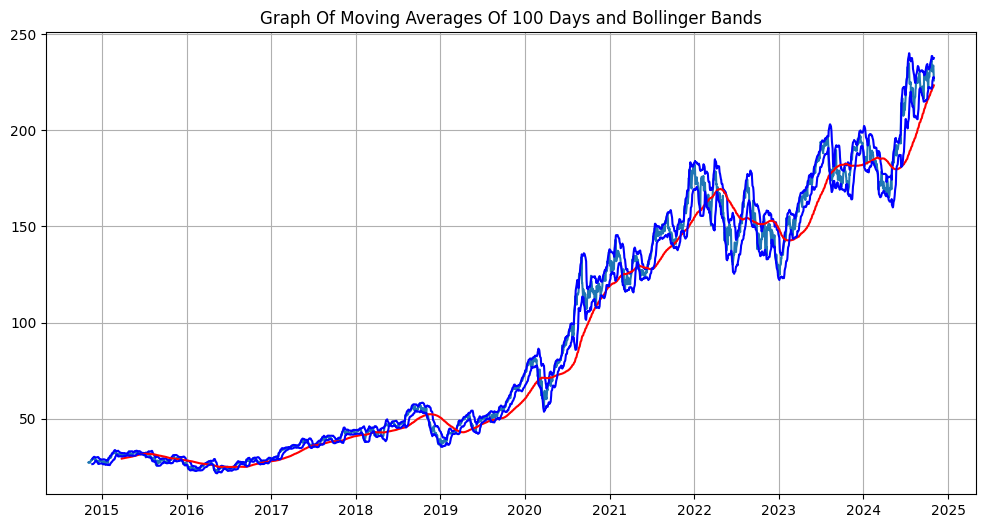

time: 506 ms (started: 2024-11-18 03:58:22 +00:00)


In [6]:
aapl_close = df[0]["Close"].squeeze() 
ma100 = aapl_close.rolling(100).mean()

BB = ta.volatility.BollingerBands(aapl_close, window=14)
high_band = BB.bollinger_hband()
low_band = BB.bollinger_lband()
    
plt.figure(figsize = (12,6))
plt.plot(aapl_close)
plt.plot(high_band, 'b')
plt.plot(ma100, 'r')
plt.plot(low_band, 'b')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days and Bollinger Bands')

In [7]:
i = 0
values_list = []

for i in range(len(df)):
    close_prices = df[i]["Close"].squeeze()
    high_prices = df[i]["High"].squeeze()
    low_prices = df[i]["Low"].squeeze()

    df[i]["RSI"] = ta.momentum.rsi(close_prices, window=14)

    # Calculate SMA with rolling() function
    df[i]["SMA7"] = close_prices.rolling(window=7).mean()
    df[i]["SMA14"] = close_prices.rolling(window=14).mean()
    df[i]["SMA21"] = close_prices.rolling(window=21).mean()
    
    df[i]['EMA7'] = ta.trend.ema_indicator(close_prices, window=7)
    df[i]['EMA25'] = ta.trend.ema_indicator(close_prices, window=25)
    df[i]['EMA99'] = ta.trend.ema_indicator(close_prices, window=99)
    df[i]['EMA200'] = ta.trend.ema_indicator(close_prices, window=200)

    df[i]["MACD"] = ta.trend.MACD(close_prices, window_slow=26, window_fast=12, window_sign=9).macd()

    # Calculate the upper and lower Bollinger Bands
    BB = ta.volatility.BollingerBands(close_prices, window=14)
    df[i]["Upper Band"] = BB.bollinger_hband()
    df[i]["Lower Band"] = BB.bollinger_lband()

    df[i]["WR"] = ta.momentum.WilliamsRIndicator(high_prices, low_prices, close_prices).williams_r()
    df[i]["CCI"] = ta.trend.CCIIndicator(close_prices, high_prices, low_prices).cci()
    df[i]["Ulcer Index"] = ta.volatility.UlcerIndex(close_prices).ulcer_index()

    df[i].dropna(inplace=True)
    df[i]["Close Next Day"] = close_prices.shift(-1).ffill(limit=2)

    # ensure all data is float
    values = df[i].values
    values = values.astype("float32")
    values_list.append(values)
    
    i += 1

time: 1.84 s (started: 2024-11-18 03:58:22 +00:00)


In [12]:
df[0]

[array([[  25.937437 ,   28.7525   ,   29.13     , ...,  -59.662037 ,
            8.949397 ,   28.1625   ],
        [  25.4052   ,   28.1625   ,   28.5875   , ..., -101.71916  ,
            8.822285 ,   26.44     ],
        [  23.851349 ,   26.44     ,   27.975    , ..., -193.64119  ,
            8.940749 ,   25.78     ],
        ...,
        [ 233.4132   ,  233.67     ,  234.33     , ...,   67.83179  ,
            1.4656546,  230.1      ],
        [ 229.84712  ,  230.1      ,  233.47     , ...,   13.082281 ,
            1.5689876,  225.91     ],
        [ 225.66173  ,  225.91     ,  229.83     , ...,  -82.14865  ,
            1.8702812,  225.91     ]], dtype=float32),
 array([[  26.646    ,   26.646    ,   26.8625   , ...,   33.519764 ,
            1.3924588,   25.789    ],
        [  25.789    ,   25.789    ,   26.6625   , ..., -146.15015  ,
            1.7476807,   24.7235   ],
        [  24.7235   ,   24.7235   ,   25.6165   , ..., -341.86887  ,
            2.7439542,   23.1685   ]

time: 12.1 ms (started: 2024-11-18 04:45:59 +00:00)


In [14]:
# Combine all stock data for global scaling
global_scaler = MinMaxScaler(feature_range=(0, 1))
combined_values = np.vstack(values_list)
scaled_combined = global_scaler.fit_transform(combined_values)

# Split data back into individual stocks
scaled_values_list = []
start_idx = 0
for values in values_list:
    scaled_values_list.append(scaled_combined[start_idx:start_idx + len(values)])
    start_idx += len(values)
    
def create_sequences(data, n_steps_in, n_steps_out):
    """
    Generate sequences for LSTM input and output.
    
    :param data: Scaled data (numpy array)
    :param n_steps_in: Number of input time steps
    :param n_steps_out: Number of output time steps
    :return: Tuple of input and output sequences
    """
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        # Input sequence: n_steps_in days (shape: n_steps_in, n_features)
        seq_x = data[i:i + n_steps_in, :]
        # Output sequence: n_steps_out days (shape: n_steps_out,)
        seq_y = data[i + n_steps_in:i + n_steps_in + n_steps_out, 3]  # Assuming column 3 is the target (Close price)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Parameters
n_steps_in = 14  # Number of days to look back
n_steps_out = 5  # Number of days to predict ahead

# Generate sequences for all stocks
train_X_list, train_y_list, test_X_list, test_y_list = [], [], [], []
for scaled_values in scaled_values_list:
    n_train = int(len(scaled_values) * 0.8)
    train_data = scaled_values[:n_train, :]
    test_data = scaled_values[n_train:, :]

    # Create sequences
    train_X, train_y = create_sequences(train_data, n_steps_in, n_steps_out)
    test_X, test_y = create_sequences(test_data, n_steps_in, n_steps_out)

    train_X_list.append(train_X)
    train_y_list.append(train_y)
    test_X_list.append(test_X)
    test_y_list.append(test_y)

# Make sure train_X_list and train_y_list have the same number of elements (samples)
train_X = np.vstack(train_X_list)
train_y = np.vstack(train_y_list)
test_X = np.vstack(test_X_list)
test_y = np.vstack(test_y_list)

print(f"train_X shape: {train_X.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"test_X shape: {test_X.shape}")
print(f"test_y shape: {test_y.shape}")

<class 'numpy.ndarray'>
train_X shape: (34865, 14, 21)
train_y shape: (34865, 5)
test_X shape: (8474, 14, 21)
test_y shape: (8474, 5)
time: 133 ms (started: 2024-11-18 04:01:40 +00:00)


In [8]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(n_steps_in, train_X.shape[2])))
model.add(Dense(units=n_steps_out))  # Output a sequence of n_steps_out values

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='mae')

print(model.summary())

2024-11-17 16:25:01.543457: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-17 16:25:01.543752: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-17 16:25:01.543942: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                14400     
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 14655 (57.25 KB)
Trainable params: 14655 (57.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
time: 2.76 s (started: 2024-11-17 16:25:01 +00:00)


In [9]:
# Train the model
history = model.fit(train_X, train_y, epochs=50, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50


2024-11-17 16:25:07.675451: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-11-17 16:25:07.824318: I external/local_xla/xla/service/service.cc:168] XLA service 0x2c24c590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-17 16:25:07.824406: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro P5000, Compute Capability 6.1
2024-11-17 16:25:07.850791: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731860708.008407    8278 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


545/545 - 7s - loss: 0.0406 - val_loss: 0.0250 - 7s/epoch - 13ms/step
Epoch 2/50
545/545 - 3s - loss: 0.0128 - val_loss: 0.0217 - 3s/epoch - 5ms/step
Epoch 3/50
545/545 - 3s - loss: 0.0106 - val_loss: 0.0194 - 3s/epoch - 5ms/step
Epoch 4/50
545/545 - 3s - loss: 0.0093 - val_loss: 0.0175 - 3s/epoch - 5ms/step
Epoch 5/50
545/545 - 3s - loss: 0.0084 - val_loss: 0.0156 - 3s/epoch - 5ms/step
Epoch 6/50
545/545 - 3s - loss: 0.0076 - val_loss: 0.0128 - 3s/epoch - 6ms/step
Epoch 7/50
545/545 - 2s - loss: 0.0071 - val_loss: 0.0120 - 2s/epoch - 4ms/step
Epoch 8/50
545/545 - 3s - loss: 0.0068 - val_loss: 0.0119 - 3s/epoch - 5ms/step
Epoch 9/50
545/545 - 3s - loss: 0.0064 - val_loss: 0.0115 - 3s/epoch - 5ms/step
Epoch 10/50
545/545 - 3s - loss: 0.0061 - val_loss: 0.0109 - 3s/epoch - 5ms/step
Epoch 11/50
545/545 - 3s - loss: 0.0061 - val_loss: 0.0108 - 3s/epoch - 5ms/step
Epoch 12/50
545/545 - 3s - loss: 0.0059 - val_loss: 0.0115 - 3s/epoch - 5ms/step
Epoch 13/50
545/545 - 3s - loss: 0.0058 - val_l

In [10]:
# Make predictions
y_pred = model.predict(test_X)

# Evaluate for each time step
for i in range(n_steps_out):
    mae = np.mean(np.abs(test_y[:, i] - y_pred[:, i]))
    print(f"MAE for step {i+1}: {mae}")

265/265 [==============================] - 1s 2ms/step
MAE for step 1: 0.00483768992125988
MAE for step 2: 0.006249474827200174
MAE for step 3: 0.010789020918309689
MAE for step 4: 0.011670621111989021
MAE for step 5: 0.012984917499125004
time: 1.7 s (started: 2024-11-17 16:27:29 +00:00)


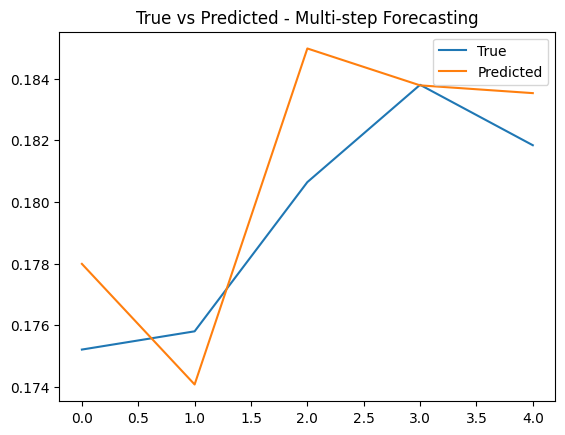

time: 211 ms (started: 2024-11-17 16:27:31 +00:00)


In [11]:
import matplotlib.pyplot as plt

# Plot example sequence
plt.plot(test_y[0], label='True')
plt.plot(y_pred[0], label='Predicted')
plt.legend()
plt.title('True vs Predicted - Multi-step Forecasting')
plt.show()


Analyzing AAPL...

Evaluation Metrics for AAPL:
MSE: 18.4824
RMSE: 4.2991
MAE:  3.6128


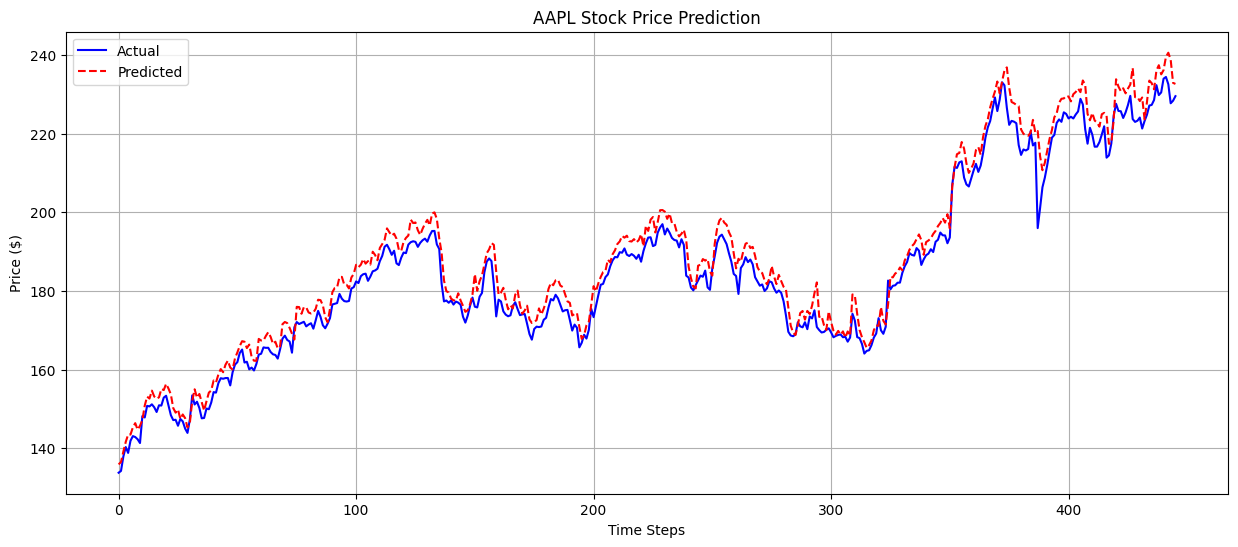


Analyzing AMZN...

Evaluation Metrics for AMZN:
MSE: 16.8661
RMSE: 4.1068
MAE:  3.2966


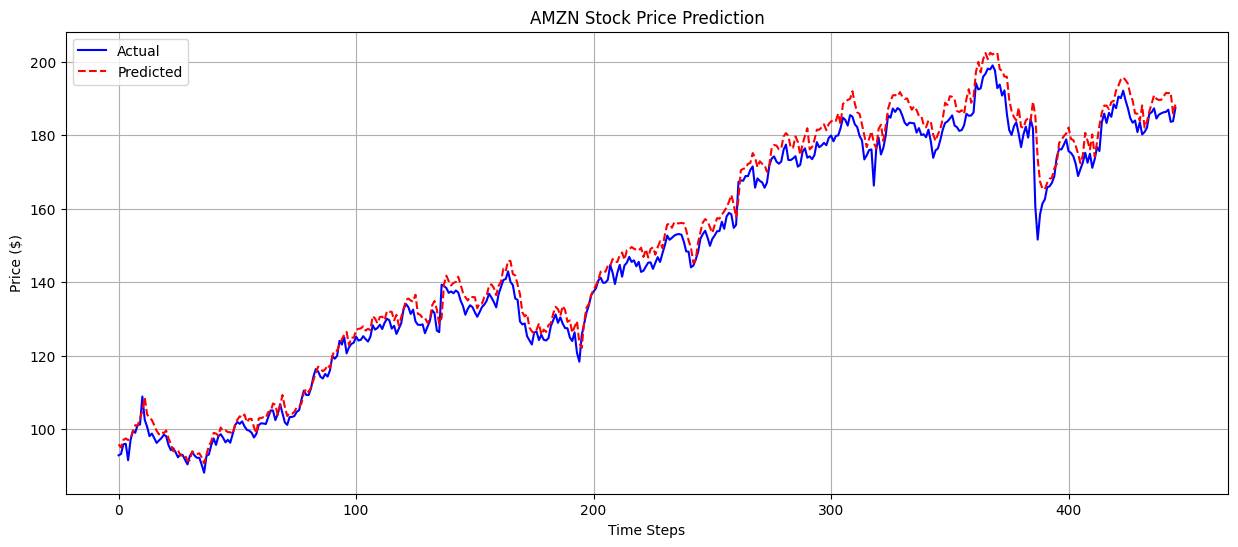


Analyzing GME...

Evaluation Metrics for GME:
MSE: 2.1597
RMSE: 1.4696
MAE:  0.9452


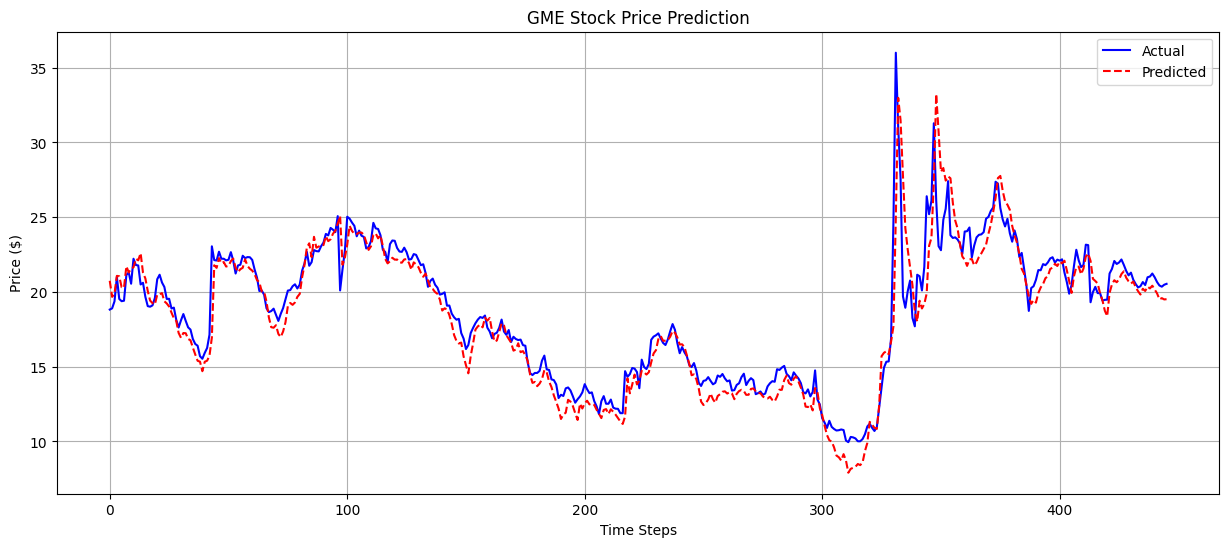


Analyzing GOOGL...

Evaluation Metrics for GOOGL:
MSE: 11.8721
RMSE: 3.4456
MAE:  2.8094


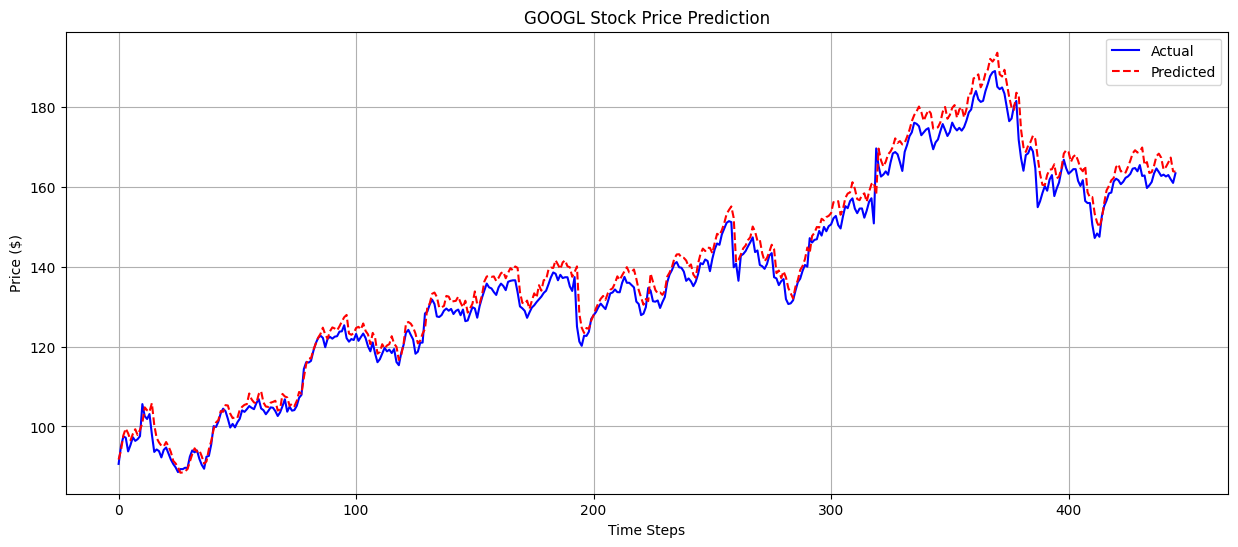


Analyzing NFLX...

Evaluation Metrics for NFLX:
MSE: 174.3372
RMSE: 13.2037
MAE:  9.4472


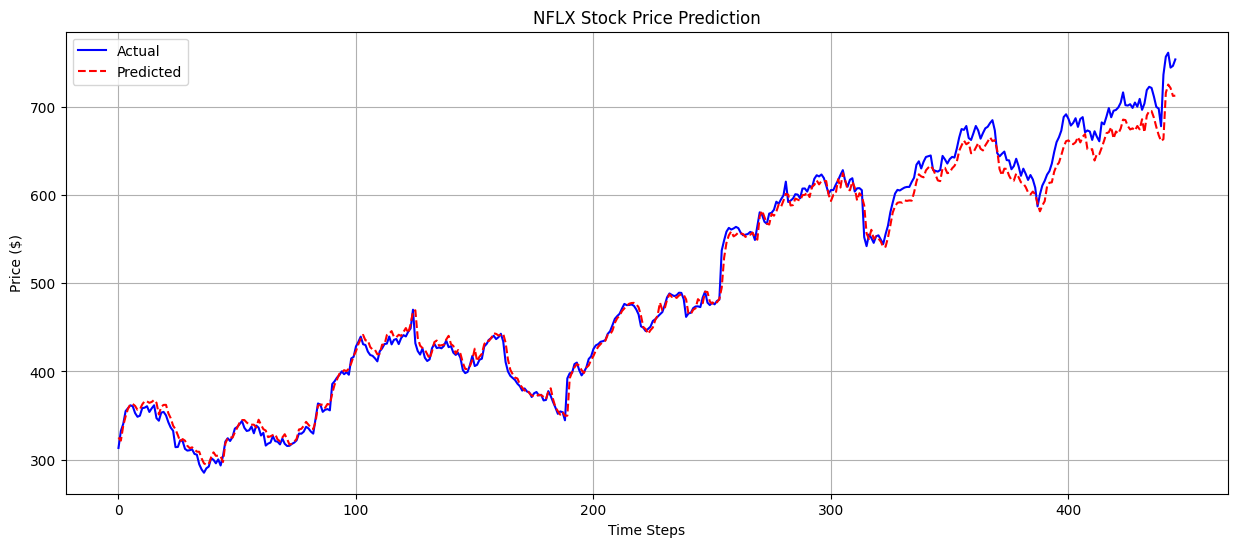


Analyzing TSLA...

Evaluation Metrics for TSLA:
MSE: 62.7471
RMSE: 7.9213
MAE:  6.1749


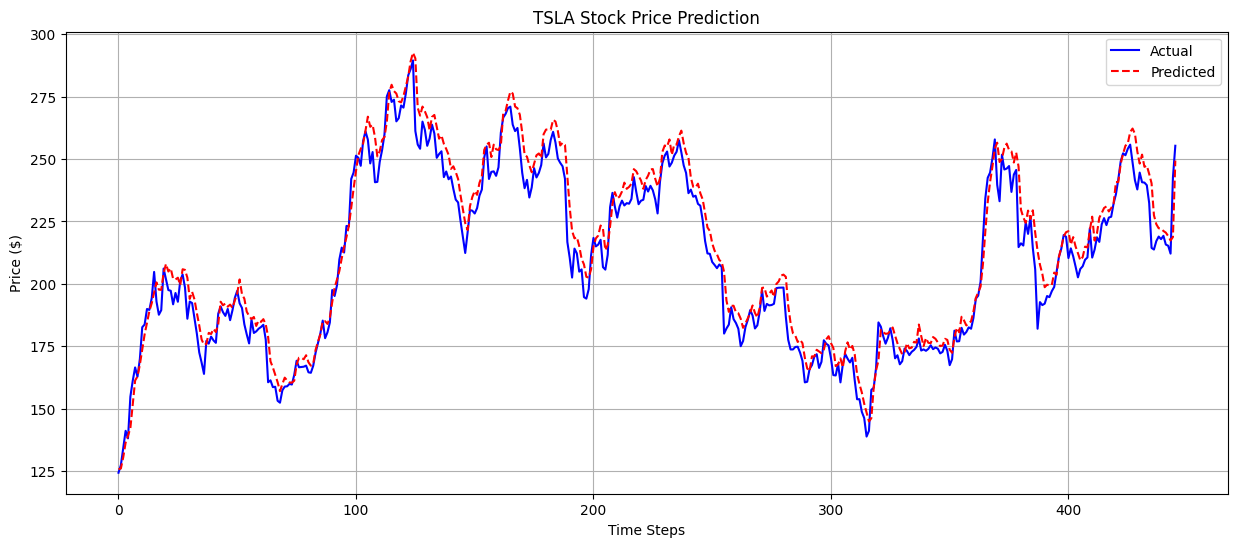


Analyzing MSFT...

Evaluation Metrics for MSFT:
MSE: 25.9402
RMSE: 5.0932
MAE:  3.9728


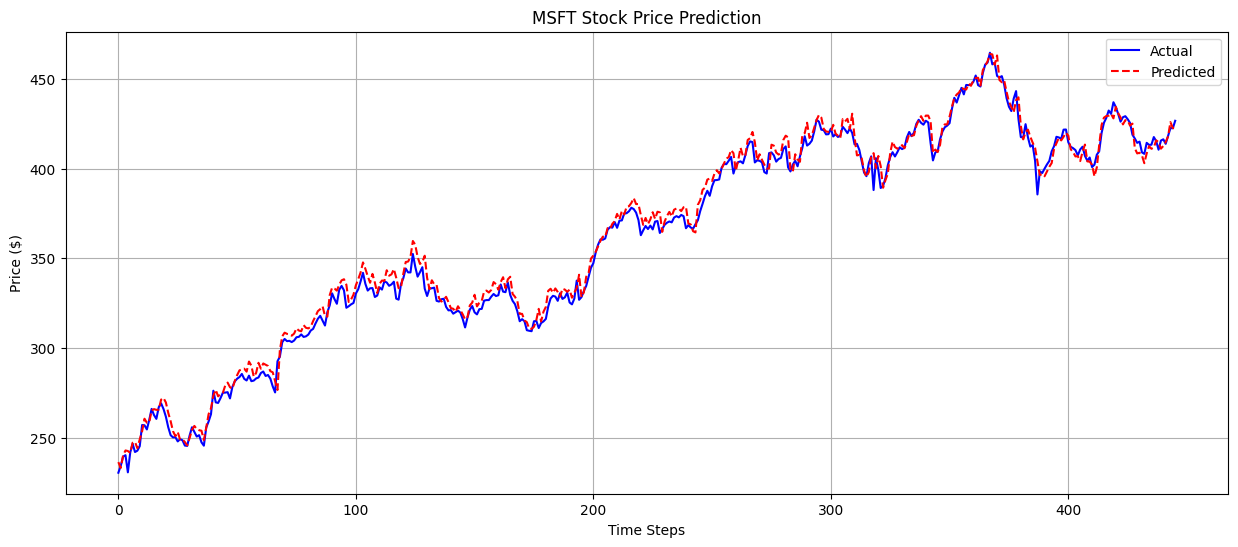


Analyzing NVDA...

Evaluation Metrics for NVDA:
MSE: 8.1814
RMSE: 2.8603
MAE:  1.6942


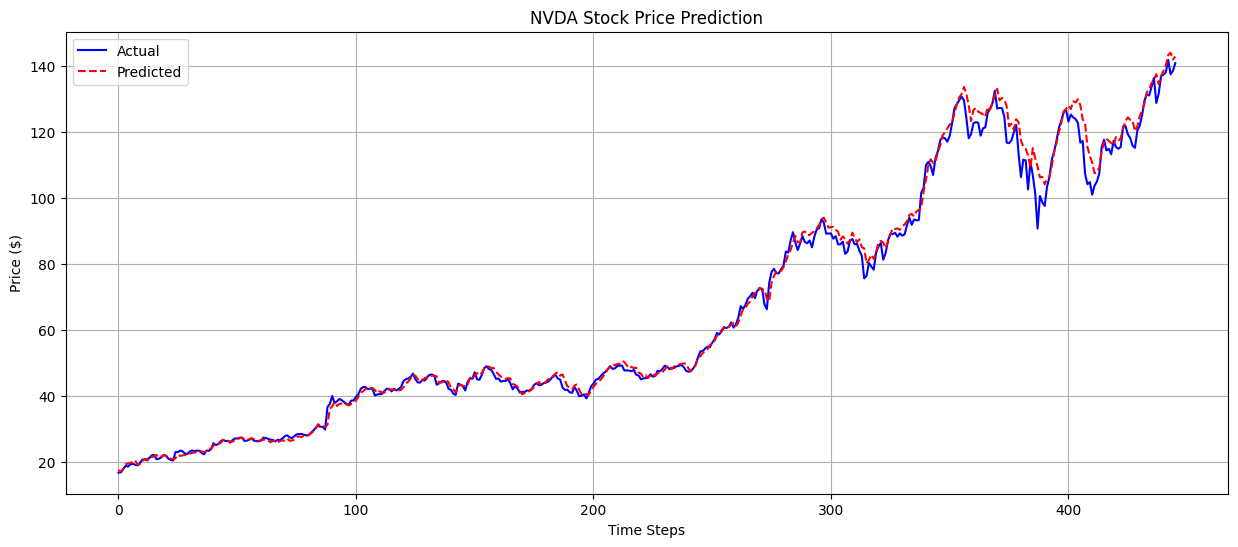


Analyzing AMD...

Evaluation Metrics for AMD:
MSE: 23.2815
RMSE: 4.8251
MAE:  3.5965


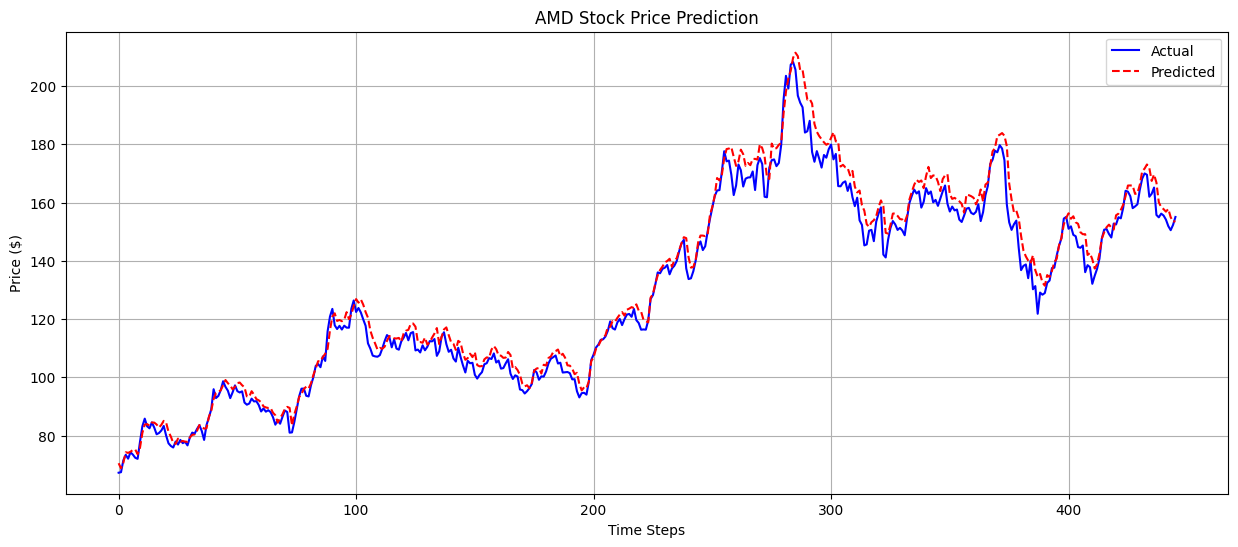


Analyzing CRM...

Evaluation Metrics for CRM:
MSE: 37.0681
RMSE: 6.0884
MAE:  4.6685


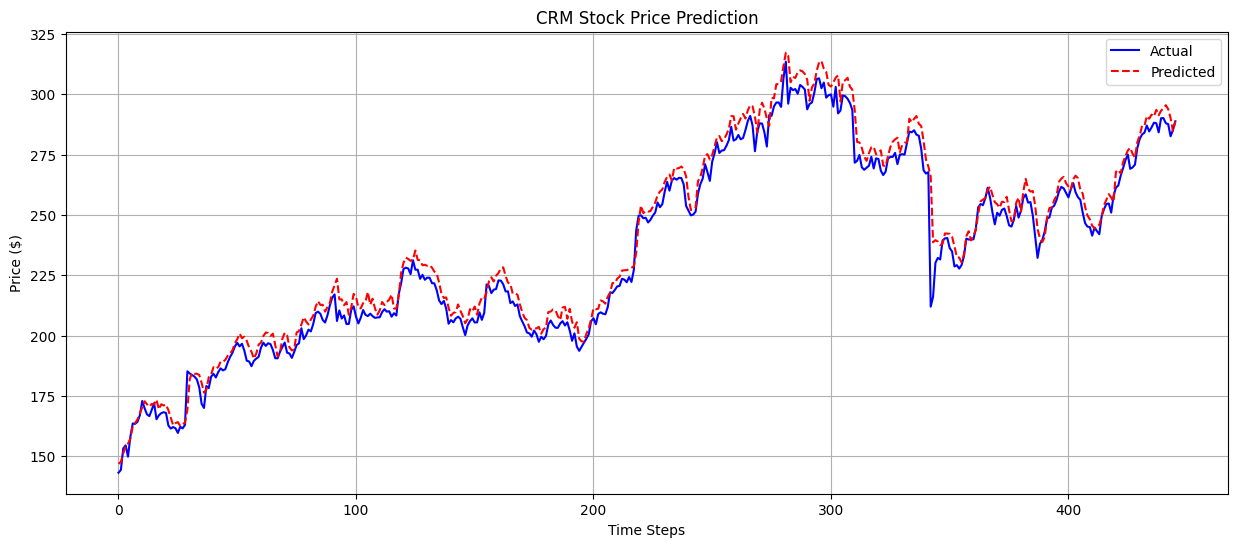


Analyzing JPM...

Evaluation Metrics for JPM:
MSE: 13.6788
RMSE: 3.6985
MAE:  3.0601


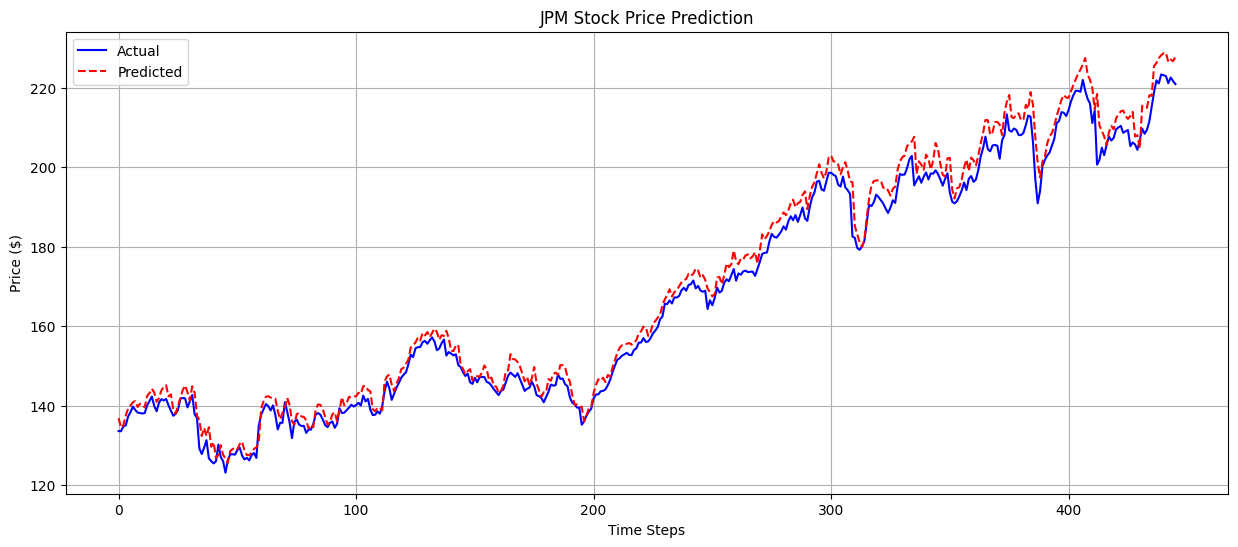


Analyzing V...

Evaluation Metrics for V:
MSE: 22.6142
RMSE: 4.7554
MAE:  4.0815


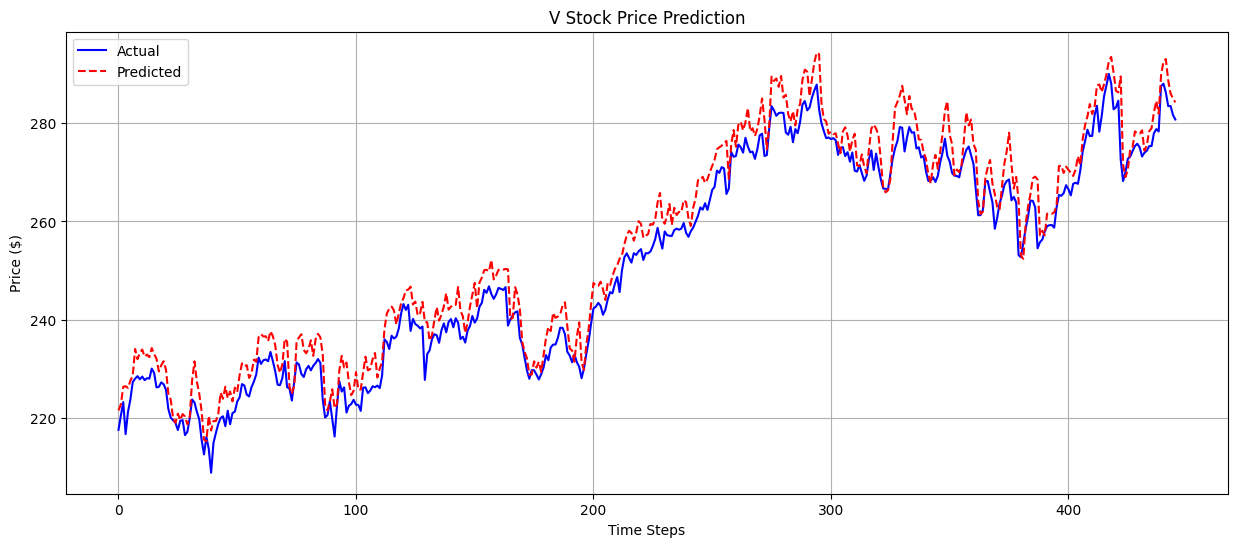


Analyzing MA...

Evaluation Metrics for MA:
MSE: 19.0428
RMSE: 4.3638
MAE:  3.3867


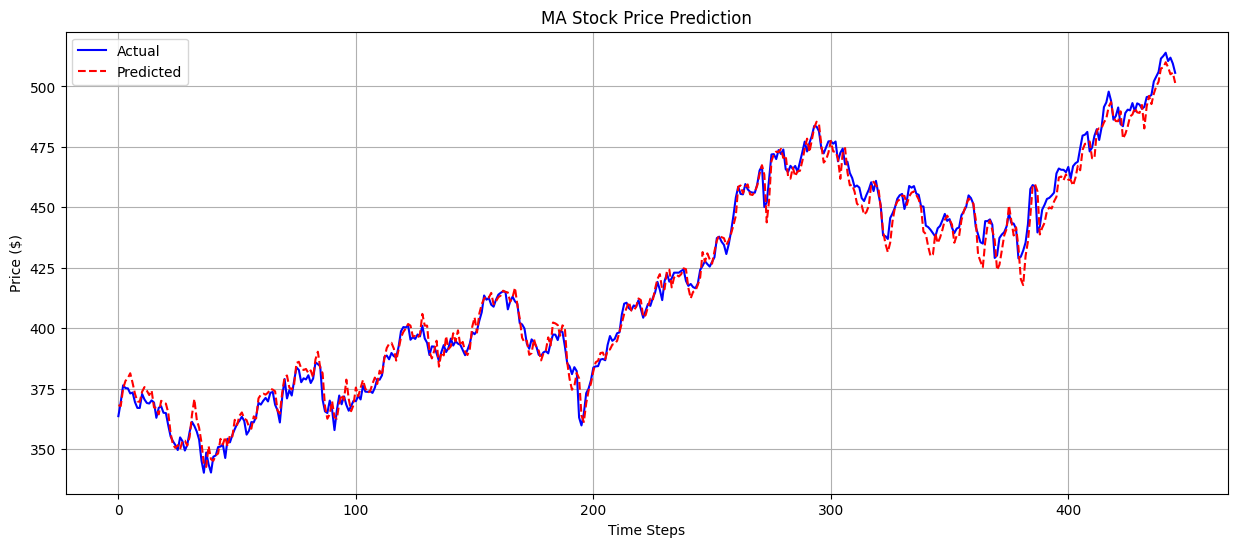


Analyzing MSTR...

Evaluation Metrics for MSTR:
MSE: 42.8938
RMSE: 6.5493
MAE:  3.6490


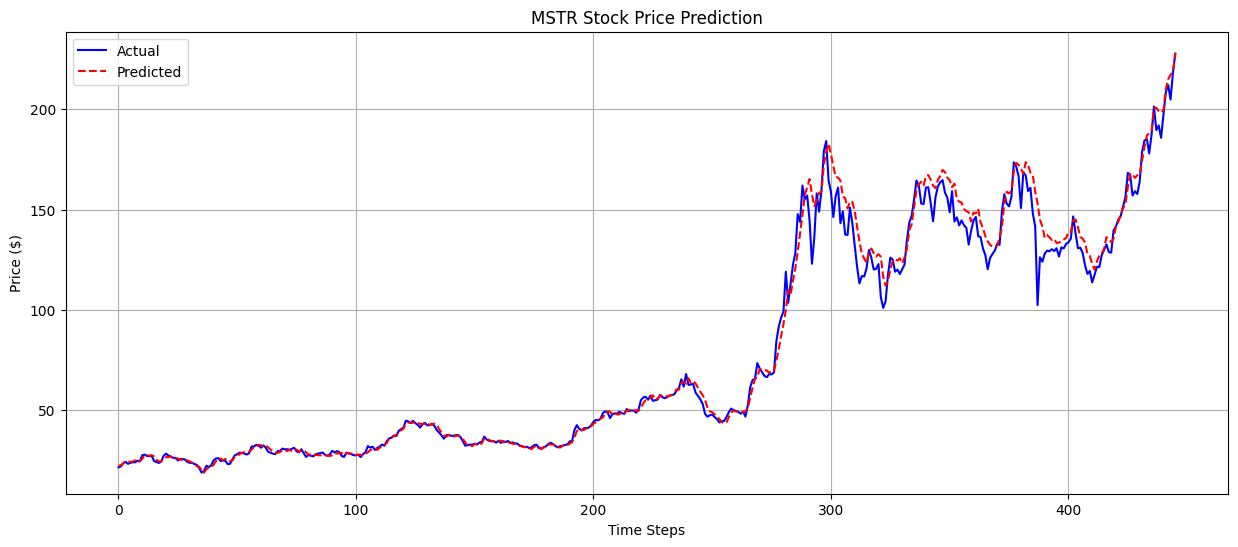


Analyzing DIS...

Evaluation Metrics for DIS:
MSE: 3.0334
RMSE: 1.7417
MAE:  1.2607


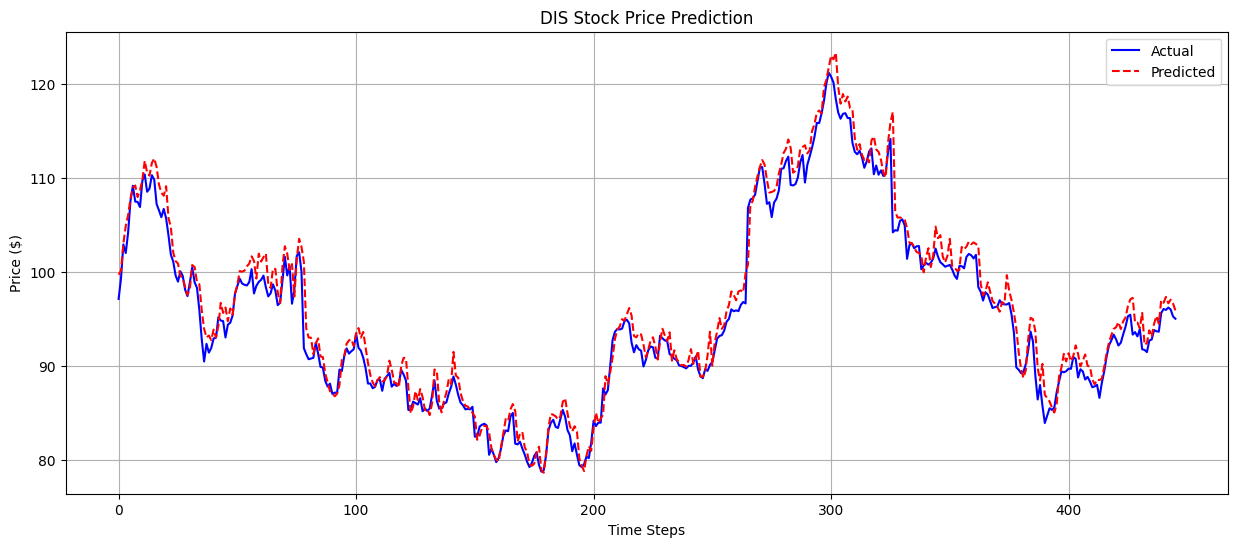


Analyzing BA...

Evaluation Metrics for BA:
MSE: 27.0237
RMSE: 5.1984
MAE:  4.1748


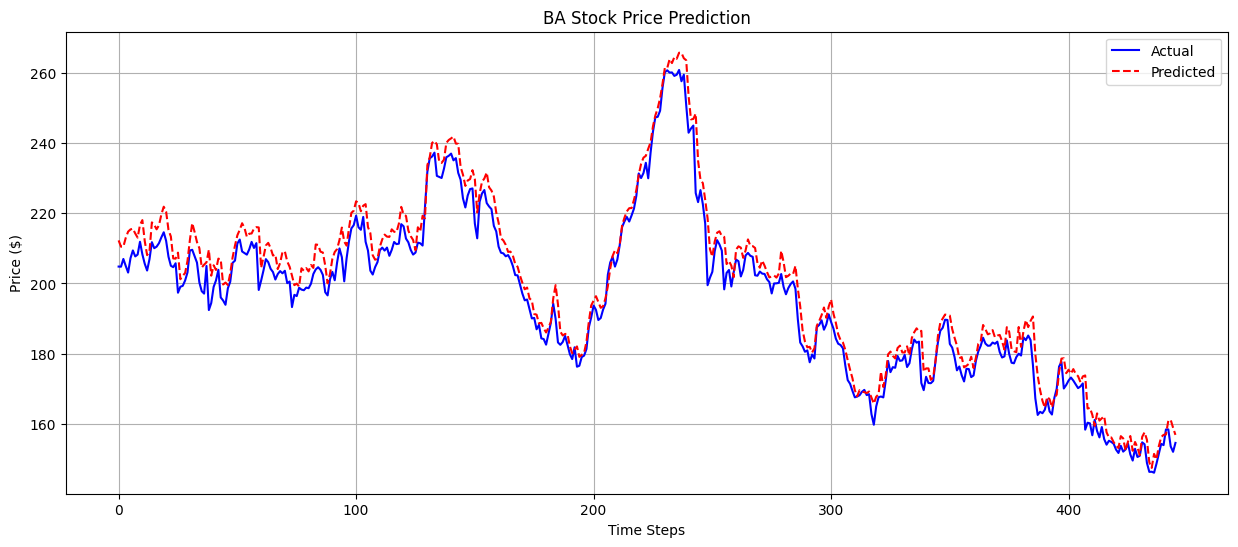


Analyzing XOM...

Evaluation Metrics for XOM:
MSE: 3.9455
RMSE: 1.9863
MAE:  1.5611


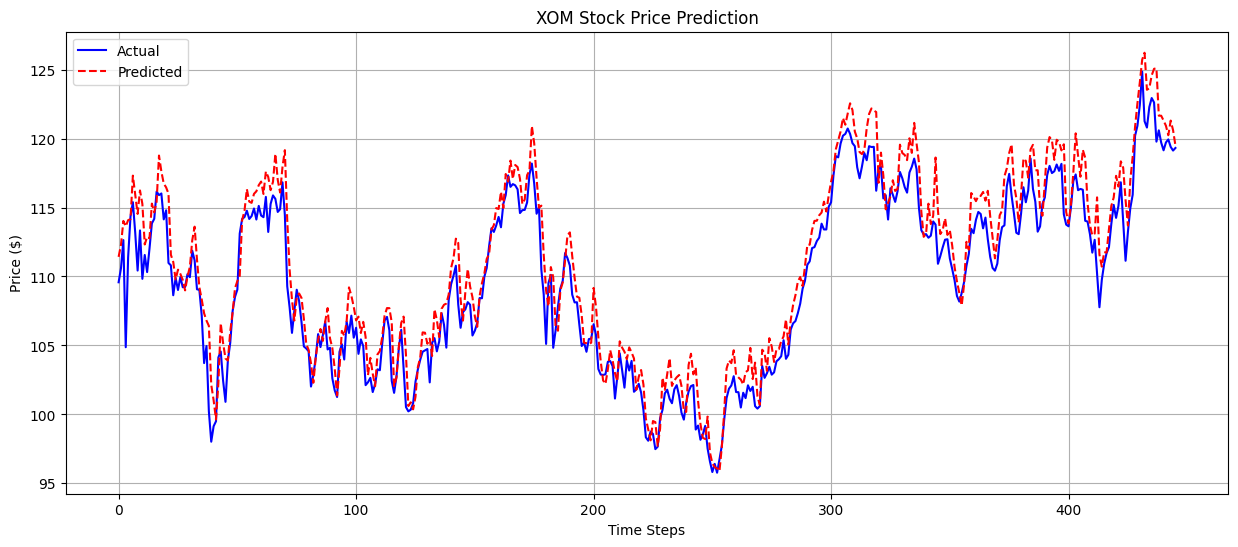


Analyzing ORCL...

Evaluation Metrics for ORCL:
MSE: 7.1014
RMSE: 2.6648
MAE:  1.9580


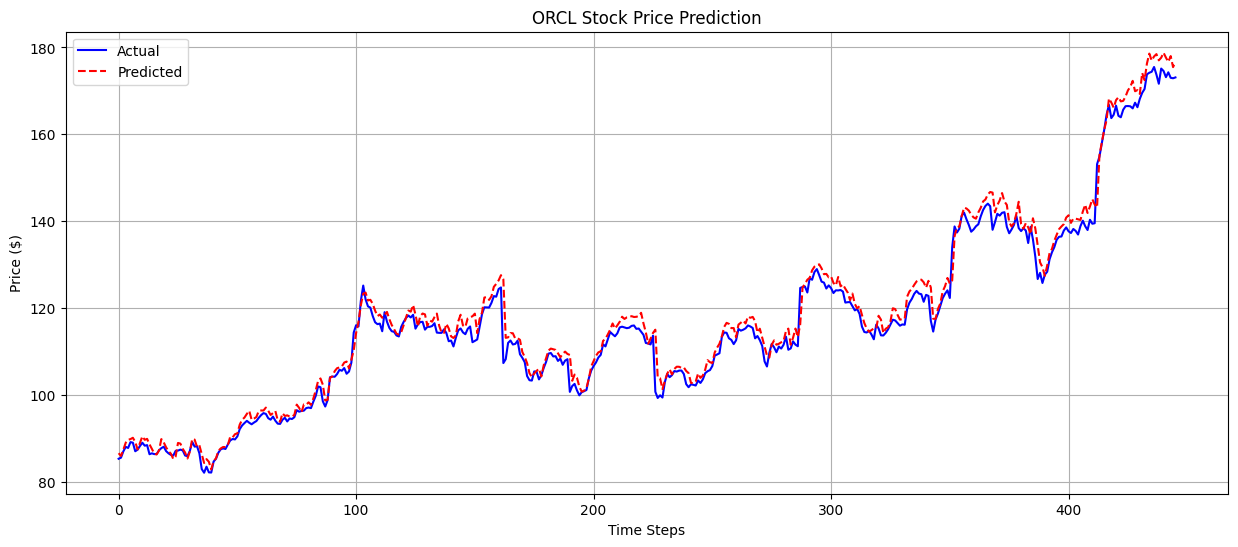


Analyzing META...

Evaluation Metrics for META:
MSE: 79.4179
RMSE: 8.9117
MAE:  6.5633


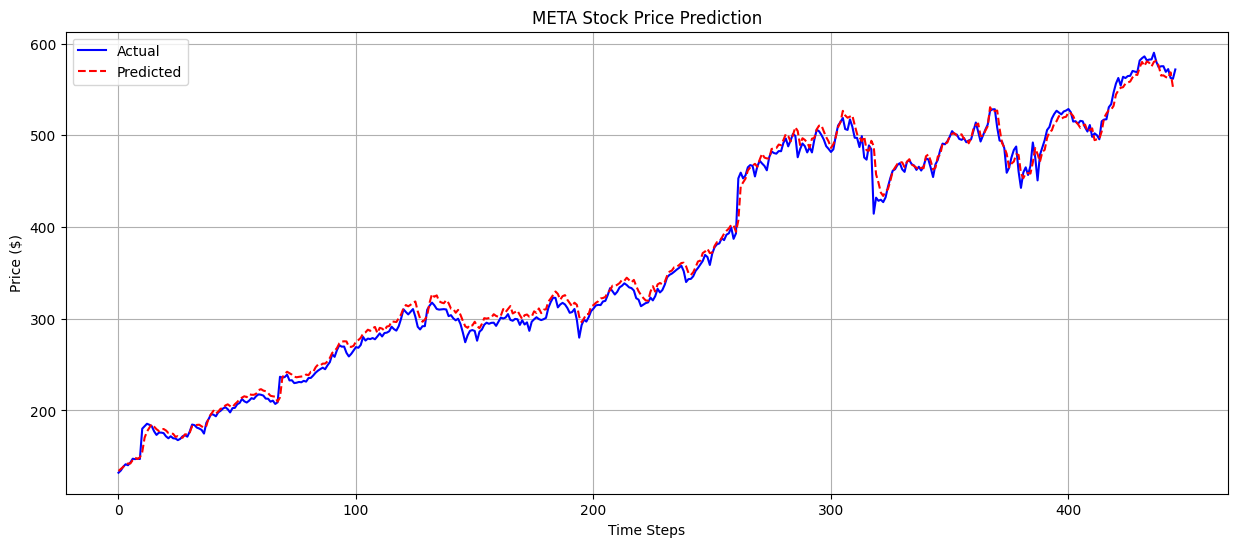


Summary of Metrics for All Stocks:
              MSE       RMSE       MAE
AAPL    18.482384   4.299114  3.612818
AMZN    16.866065   4.106832  3.296555
GME      2.159700   1.469592  0.945194
GOOGL   11.872144   3.445598  2.809424
NFLX   174.337234  13.203683  9.447194
TSLA    62.747137   7.921309  6.174888
MSFT    25.940180   5.093150  3.972768
NVDA     8.181426   2.860319  1.694155
AMD     23.281540   4.825095  3.596539
CRM     37.068088   6.088357  4.668525
JPM     13.678840   3.698492  3.060082
V       22.614218   4.755441  4.081469
MA      19.042780   4.363803  3.386674
MSTR    42.893771   6.549334  3.649008
DIS      3.033362   1.741655  1.260733
BA      27.023686   5.198431  4.174808
XOM      3.945491   1.986326  1.561081
ORCL     7.101351   2.664836  1.958002
META    79.417851   8.911669  6.563308

Making Future Predictions...

Predicting future prices for AAPL...

AAPL - Next 5 days price predictions:
Day 1: $232.68
Day 2: $227.17
Day 3: $236.10
Day 4: $236.29
Day 5: $238.35
Da

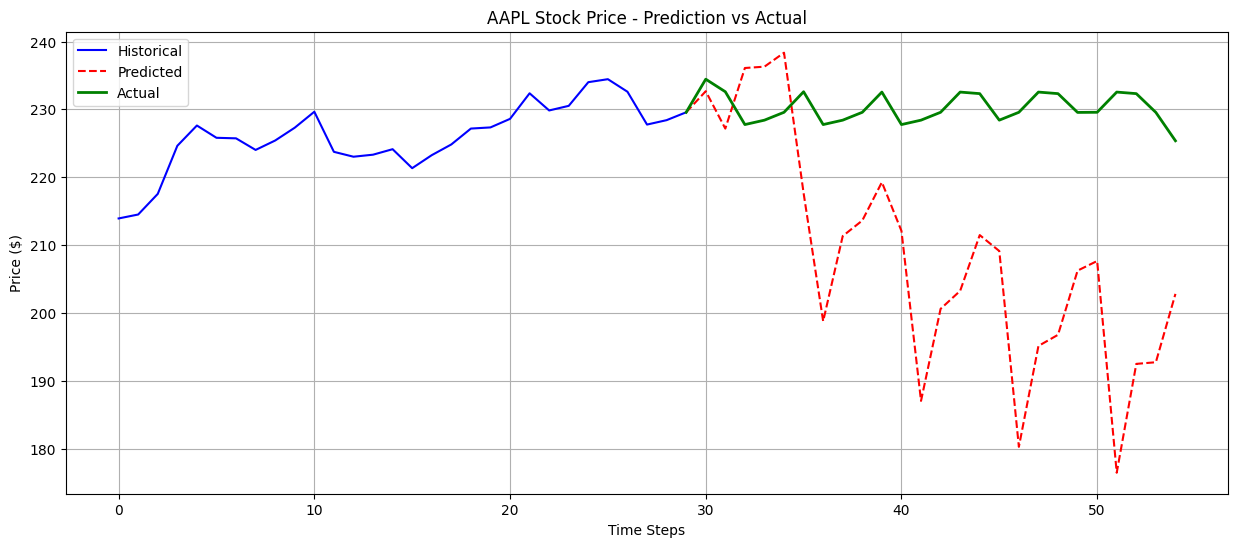


Predicting future prices for AMZN...

AMZN - Next 5 days price predictions:
Day 1: $188.38
Day 2: $183.41
Day 3: $192.82
Day 4: $192.44
Day 5: $194.03
Day 6: $176.56
Day 7: $158.77
Day 8: $172.85
Day 9: $174.87
Day 10: $181.88
Day 11: $172.74
Day 12: $148.71
Day 13: $164.51
Day 14: $167.44
Day 15: $176.99
Day 16: $170.99
Day 17: $143.15
Day 18: $160.61
Day 19: $163.28
Day 20: $173.86
Day 21: $170.45
Day 22: $140.32
Day 23: $159.10
Day 24: $161.19
Day 25: $171.97

AMZN - Actual prices for comparison:
Day 1: $186.40
Day 2: $186.98
Day 3: $183.69
Day 4: $183.86
Day 5: $187.53
Day 6: $186.98
Day 7: $183.69
Day 8: $183.86
Day 9: $187.53
Day 10: $188.21
Day 11: $183.69
Day 12: $183.86
Day 13: $187.53
Day 14: $188.21
Day 15: $187.82
Day 16: $183.86
Day 17: $187.53
Day 18: $188.21
Day 19: $187.82
Day 20: $192.42
Day 21: $187.53
Day 22: $188.21
Day 23: $187.82
Day 24: $192.42
Day 25: $185.23


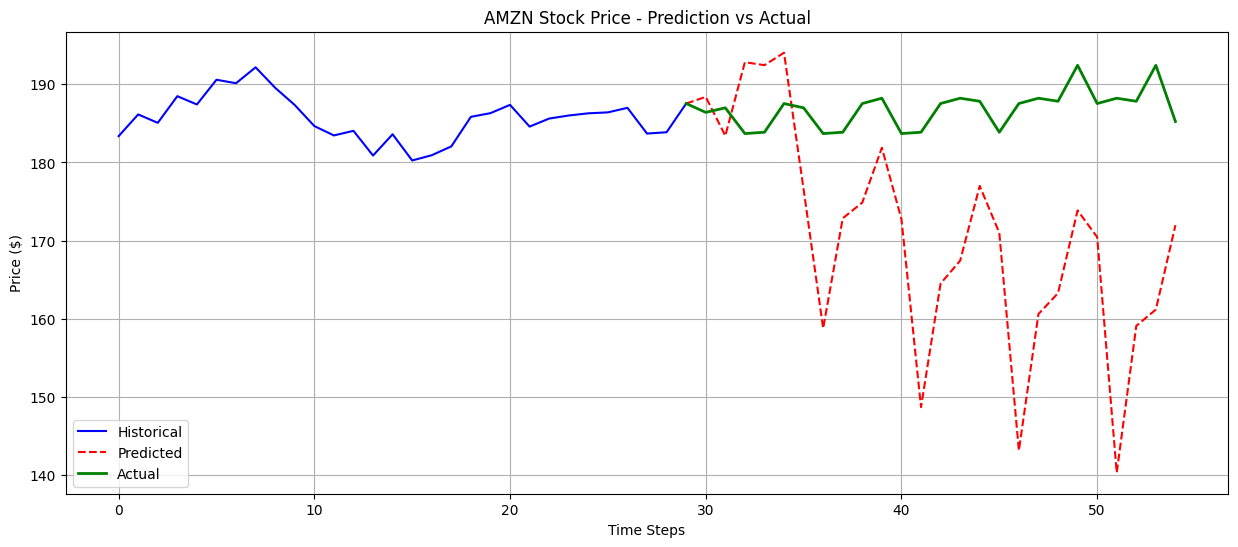


Predicting future prices for GME...

GME - Next 5 days price predictions:
Day 1: $19.51
Day 2: $18.85
Day 3: $22.58
Day 4: $23.85
Day 5: $22.59
Day 6: $17.05
Day 7: $0.68
Day 8: $15.89
Day 9: $17.64
Day 10: $26.41
Day 11: $18.14
Day 12: $-8.36
Day 13: $13.72
Day 14: $15.94
Day 15: $30.37
Day 16: $19.77
Day 17: $-12.35
Day 18: $14.58
Day 19: $17.37
Day 20: $34.29
Day 21: $21.71
Day 22: $-13.29
Day 23: $16.96
Day 24: $20.60
Day 25: $38.00

GME - Actual prices for comparison:
Day 1: $20.66
Day 2: $20.43
Day 3: $20.35
Day 4: $20.48
Day 5: $20.54
Day 6: $20.43
Day 7: $20.35
Day 8: $20.48
Day 9: $20.54
Day 10: $20.73
Day 11: $20.35
Day 12: $20.48
Day 13: $20.54
Day 14: $20.73
Day 15: $22.09
Day 16: $20.48
Day 17: $20.54
Day 18: $20.73
Day 19: $22.09
Day 20: $22.75
Day 21: $20.54
Day 22: $20.73
Day 23: $22.09
Day 24: $22.75
Day 25: $22.05


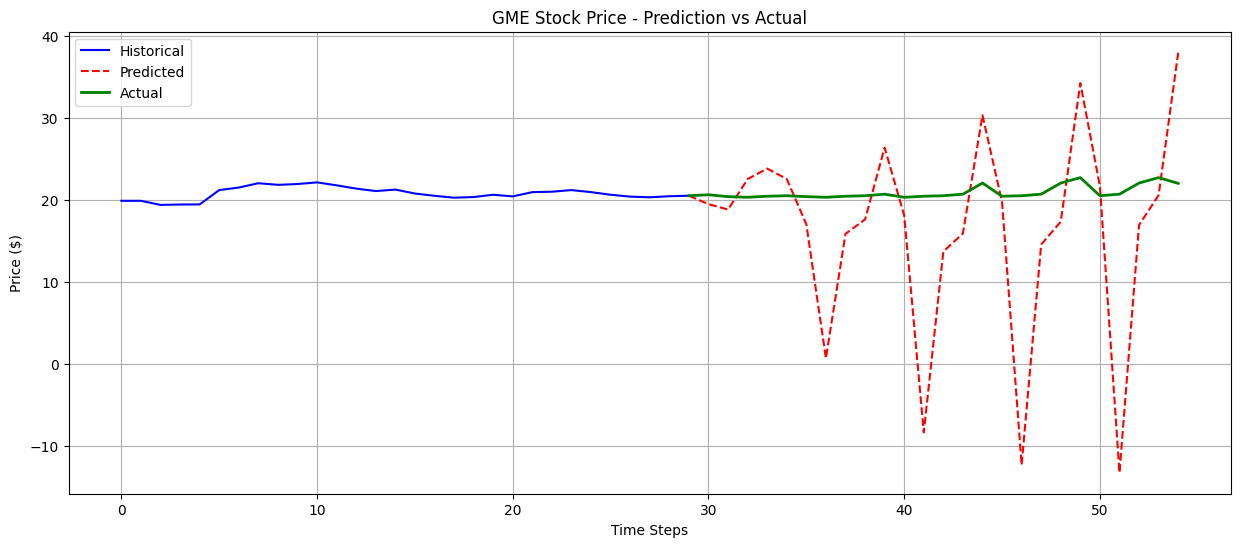


Predicting future prices for GOOGL...

GOOGL - Next 5 days price predictions:
Day 1: $163.81
Day 2: $160.43
Day 3: $169.04
Day 4: $169.56
Day 5: $170.16
Day 6: $153.89
Day 7: $137.98
Day 8: $151.75
Day 9: $155.40
Day 10: $161.56
Day 11: $150.63
Day 12: $128.17
Day 13: $144.37
Day 14: $148.85
Day 15: $157.78
Day 16: $149.23
Day 17: $122.67
Day 18: $141.01
Day 19: $145.41
Day 20: $155.40
Day 21: $148.95
Day 22: $119.87
Day 23: $139.86
Day 24: $143.96
Day 25: $154.06

GOOGL - Actual prices for comparison:
Day 1: $162.62
Day 2: $162.98
Day 3: $161.93
Day 4: $161.01
Day 5: $163.42
Day 6: $162.98
Day 7: $161.93
Day 8: $161.01
Day 9: $163.42
Day 10: $163.95
Day 11: $161.93
Day 12: $161.01
Day 13: $163.42
Day 14: $163.95
Day 15: $167.09
Day 16: $161.01
Day 17: $163.42
Day 18: $163.95
Day 19: $167.09
Day 20: $174.06
Day 21: $163.42
Day 22: $163.95
Day 23: $167.09
Day 24: $174.06
Day 25: $171.00


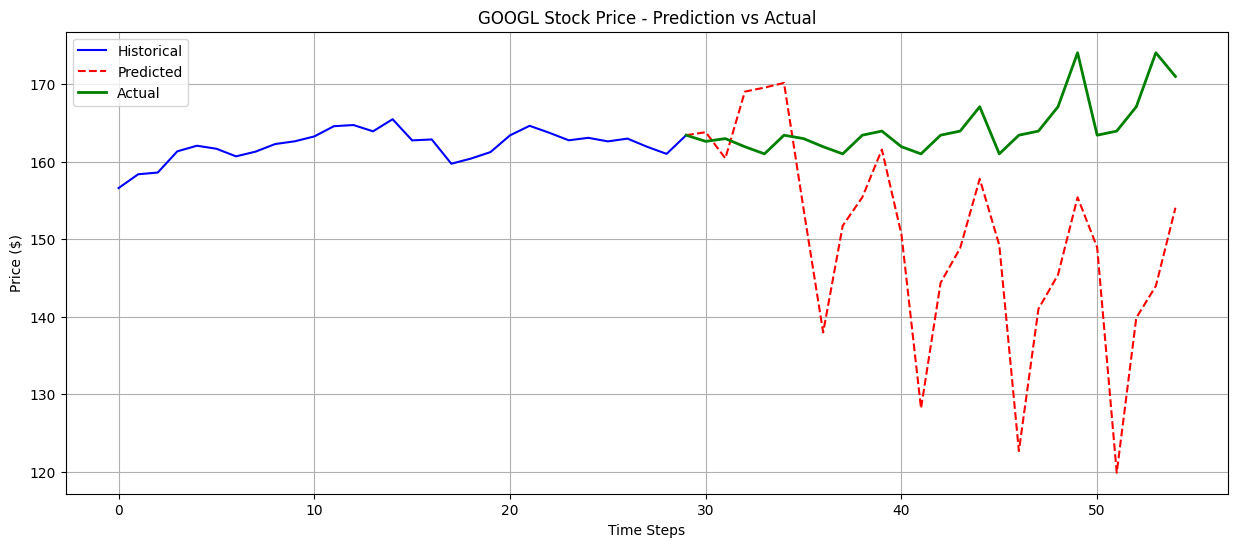


Predicting future prices for NFLX...

NFLX - Next 5 days price predictions:
Day 1: $712.49
Day 2: $701.85
Day 3: $700.67
Day 4: $684.50
Day 5: $661.58
Day 6: $643.65
Day 7: $626.49
Day 8: $625.78
Day 9: $619.64
Day 10: $544.62
Day 11: $597.88
Day 12: $579.30
Day 13: $576.37
Day 14: $568.55
Day 15: $506.20
Day 16: $561.86
Day 17: $540.88
Day 18: $537.08
Day 19: $526.92
Day 20: $475.75
Day 21: $532.08
Day 22: $507.70
Day 23: $503.86
Day 24: $490.22
Day 25: $450.93

NFLX - Actual prices for comparison:
Day 1: $756.60
Day 2: $761.12
Day 3: $744.26
Day 4: $746.25
Day 5: $753.53
Day 6: $761.12
Day 7: $744.26
Day 8: $746.25
Day 9: $753.53
Day 10: $747.88
Day 11: $744.26
Day 12: $746.25
Day 13: $753.53
Day 14: $747.88
Day 15: $748.01
Day 16: $746.25
Day 17: $753.53
Day 18: $747.88
Day 19: $748.01
Day 20: $752.28
Day 21: $753.53
Day 22: $747.88
Day 23: $748.01
Day 24: $752.28
Day 25: $752.23


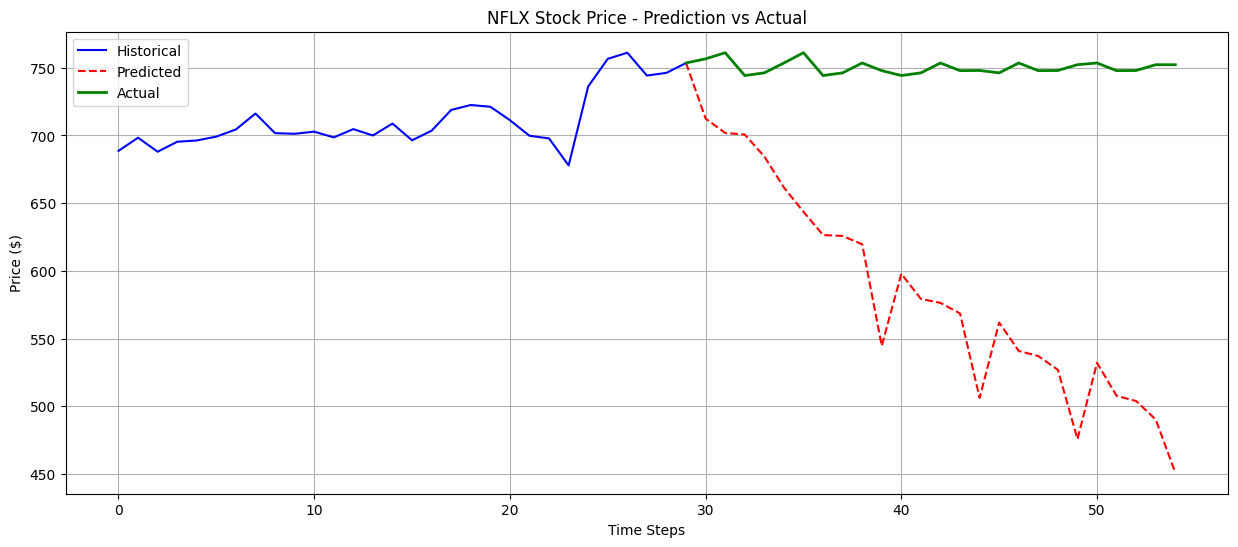


Predicting future prices for TSLA...

TSLA - Next 5 days price predictions:
Day 1: $249.38
Day 2: $234.61
Day 3: $243.86
Day 4: $236.92
Day 5: $242.01
Day 6: $232.78
Day 7: $211.89
Day 8: $222.92
Day 9: $217.90
Day 10: $227.07
Day 11: $228.86
Day 12: $202.95
Day 13: $214.66
Day 14: $211.25
Day 15: $222.08
Day 16: $227.13
Day 17: $197.84
Day 18: $210.63
Day 19: $207.16
Day 20: $218.62
Day 21: $226.44
Day 22: $194.88
Day 23: $208.76
Day 24: $204.56
Day 25: $216.37

TSLA - Actual prices for comparison:
Day 1: $215.73
Day 2: $215.26
Day 3: $212.11
Day 4: $242.65
Day 5: $255.32
Day 6: $215.26
Day 7: $212.11
Day 8: $242.65
Day 9: $255.32
Day 10: $262.24
Day 11: $212.11
Day 12: $242.65
Day 13: $255.32
Day 14: $262.24
Day 15: $255.51
Day 16: $242.65
Day 17: $255.32
Day 18: $262.24
Day 19: $255.51
Day 20: $255.82
Day 21: $255.32
Day 22: $262.24
Day 23: $255.51
Day 24: $255.82
Day 25: $249.25


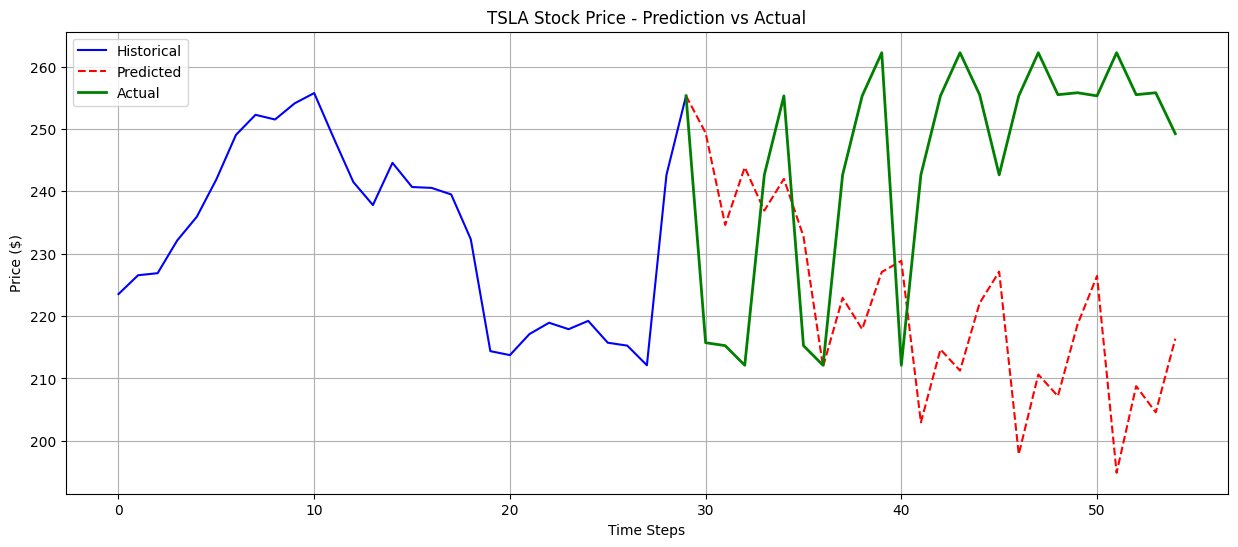


Predicting future prices for MSFT...

MSFT - Next 5 days price predictions:
Day 1: $422.41
Day 2: $416.96
Day 3: $419.50
Day 4: $418.61
Day 5: $413.44
Day 6: $393.62
Day 7: $374.93
Day 8: $375.39
Day 9: $376.71
Day 10: $362.10
Day 11: $378.52
Day 12: $353.79
Day 13: $353.48
Day 14: $352.18
Day 15: $343.57
Day 16: $367.71
Day 17: $338.44
Day 18: $339.20
Day 19: $333.78
Day 20: $330.14
Day 21: $359.40
Day 22: $326.56
Day 23: $329.06
Day 24: $319.18
Day 25: $320.27

MSFT - Actual prices for comparison:
Day 1: $413.75
Day 2: $418.04
Day 3: $422.53
Day 4: $422.40
Day 5: $426.57
Day 6: $418.04
Day 7: $422.53
Day 8: $422.40
Day 9: $426.57
Day 10: $426.30
Day 11: $422.53
Day 12: $422.40
Day 13: $426.57
Day 14: $426.30
Day 15: $425.80
Day 16: $422.40
Day 17: $426.57
Day 18: $426.30
Day 19: $425.80
Day 20: $432.10
Day 21: $426.57
Day 22: $426.30
Day 23: $425.80
Day 24: $432.10
Day 25: $406.30


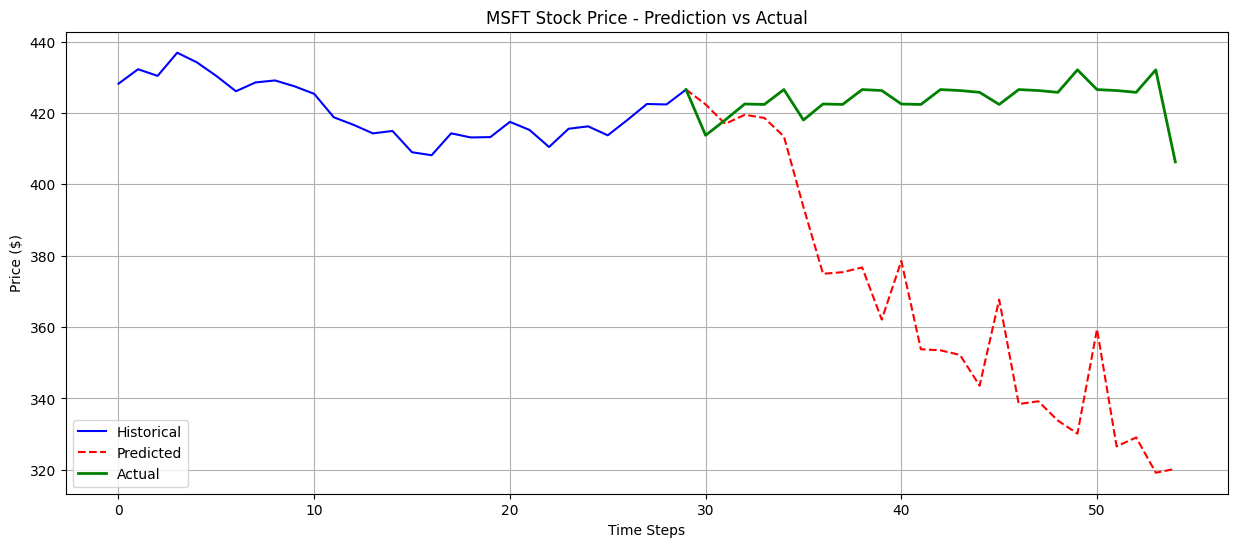


Predicting future prices for NVDA...

NVDA - Next 5 days price predictions:
Day 1: $142.79
Day 2: $138.08
Day 3: $147.42
Day 4: $144.64
Day 5: $144.92
Day 6: $131.90
Day 7: $111.33
Day 8: $130.16
Day 9: $129.12
Day 10: $136.91
Day 11: $129.57
Day 12: $101.09
Day 13: $123.19
Day 14: $124.10
Day 15: $135.39
Day 16: $129.02
Day 17: $96.48
Day 18: $120.77
Day 19: $122.39
Day 20: $135.00
Day 21: $129.44
Day 22: $95.12
Day 23: $120.69
Day 24: $122.71
Day 25: $135.33

NVDA - Actual prices for comparison:
Day 1: $138.00
Day 2: $141.78
Day 3: $137.46
Day 4: $138.46
Day 5: $140.80
Day 6: $141.78
Day 7: $137.46
Day 8: $138.46
Day 9: $140.80
Day 10: $140.05
Day 11: $137.46
Day 12: $138.46
Day 13: $140.80
Day 14: $140.05
Day 15: $138.90
Day 16: $138.46
Day 17: $140.80
Day 18: $140.05
Day 19: $138.90
Day 20: $136.81
Day 21: $140.80
Day 22: $140.05
Day 23: $138.90
Day 24: $136.81
Day 25: $132.11


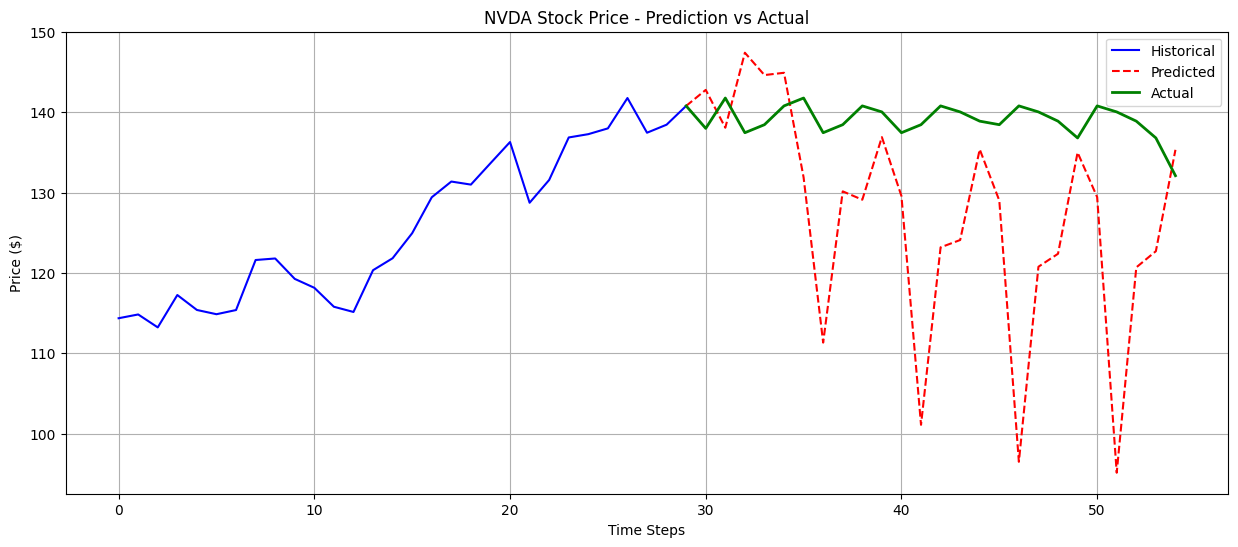


Predicting future prices for AMD...

AMD - Next 5 days price predictions:
Day 1: $153.63
Day 2: $151.50
Day 3: $158.81
Day 4: $158.64
Day 5: $159.26
Day 6: $146.16
Day 7: $132.33
Day 8: $144.74
Day 9: $147.84
Day 10: $154.70
Day 11: $143.87
Day 12: $123.50
Day 13: $138.65
Day 14: $142.16
Day 15: $151.85
Day 16: $143.09
Day 17: $118.33
Day 18: $135.91
Day 19: $139.51
Day 20: $150.10
Day 21: $143.22
Day 22: $115.57
Day 23: $135.06
Day 24: $138.66
Day 25: $149.16

AMD - Actual prices for comparison:
Day 1: $154.15
Day 2: $151.91
Day 3: $150.52
Day 4: $152.35
Day 5: $155.05
Day 6: $151.91
Day 7: $150.52
Day 8: $152.35
Day 9: $155.05
Day 10: $157.04
Day 11: $150.52
Day 12: $152.35
Day 13: $155.05
Day 14: $157.04
Day 15: $158.94
Day 16: $152.35
Day 17: $155.05
Day 18: $157.04
Day 19: $158.94
Day 20: $148.10
Day 21: $155.05
Day 22: $157.04
Day 23: $158.94
Day 24: $148.10
Day 25: $143.33


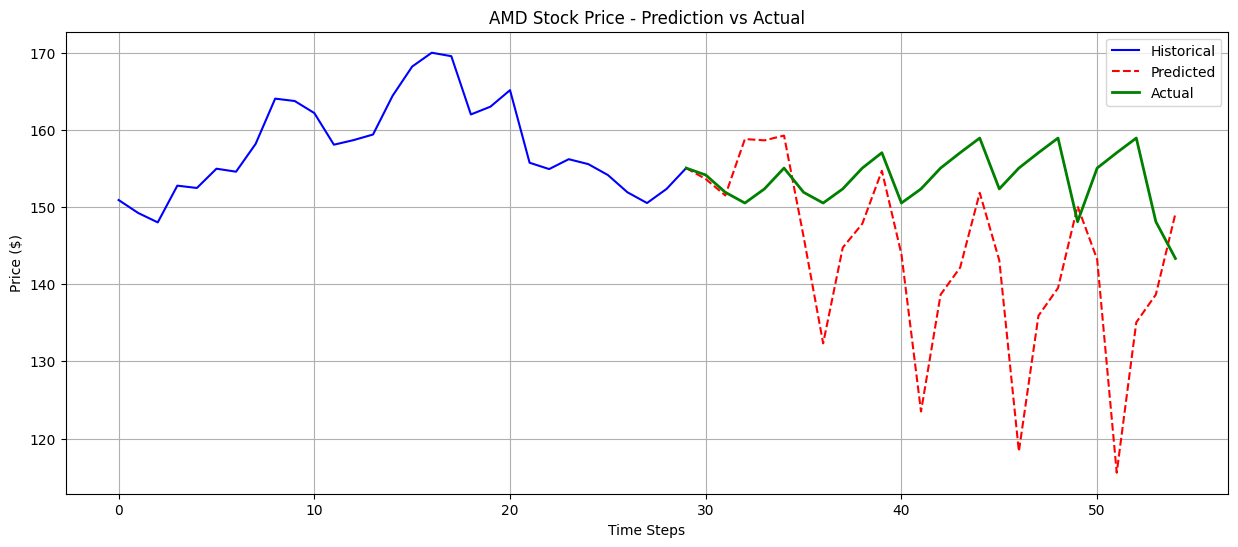


Predicting future prices for CRM...

CRM - Next 5 days price predictions:
Day 1: $288.84
Day 2: $281.03
Day 3: $290.07
Day 4: $286.25
Day 5: $290.50
Day 6: $270.36
Day 7: $249.61
Day 8: $260.57
Day 9: $260.85
Day 10: $264.94
Day 11: $262.15
Day 12: $235.69
Day 13: $246.70
Day 14: $246.43
Day 15: $253.71
Day 16: $257.25
Day 17: $226.92
Day 18: $238.82
Day 19: $236.77
Day 20: $245.83
Day 21: $254.30
Day 22: $221.34
Day 23: $234.29
Day 24: $230.18
Day 25: $240.44

CRM - Actual prices for comparison:
Day 1: $288.04
Day 2: $287.65
Day 3: $282.62
Day 4: $285.18
Day 5: $288.83
Day 6: $287.65
Day 7: $282.62
Day 8: $285.18
Day 9: $288.83
Day 10: $292.49
Day 11: $282.62
Day 12: $285.18
Day 13: $288.83
Day 14: $292.49
Day 15: $292.81
Day 16: $285.18
Day 17: $288.83
Day 18: $292.49
Day 19: $292.81
Day 20: $296.35
Day 21: $288.83
Day 22: $292.49
Day 23: $292.81
Day 24: $296.35
Day 25: $289.55


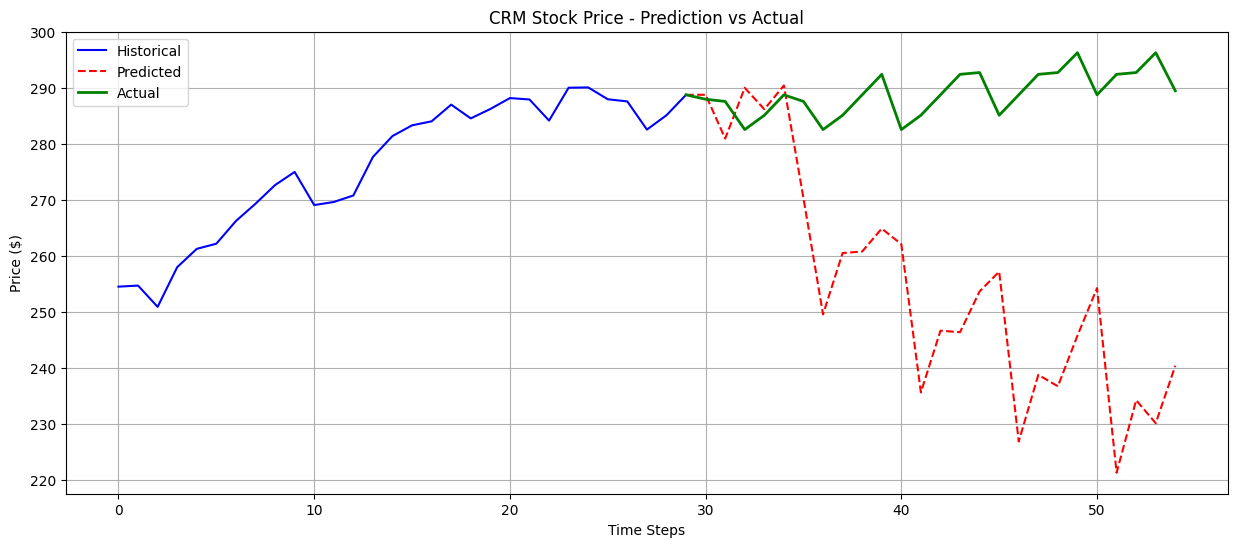


Predicting future prices for JPM...

JPM - Next 5 days price predictions:
Day 1: $227.78
Day 2: $224.68
Day 3: $231.89
Day 4: $234.12
Day 5: $234.42
Day 6: $209.39
Day 7: $190.97
Day 8: $204.30
Day 9: $207.06
Day 10: $211.56
Day 11: $203.75
Day 12: $177.87
Day 13: $192.98
Day 14: $196.33
Day 15: $204.10
Day 16: $200.95
Day 17: $170.77
Day 18: $187.56
Day 19: $189.88
Day 20: $199.19
Day 21: $199.70
Day 22: $167.08
Day 23: $185.15
Day 24: $186.01
Day 25: $196.07

JPM - Actual prices for comparison:
Day 1: $222.90
Day 2: $221.10
Day 3: $222.53
Day 4: $221.66
Day 5: $220.88
Day 6: $221.10
Day 7: $222.53
Day 8: $221.66
Day 9: $220.88
Day 10: $222.95
Day 11: $222.53
Day 12: $221.66
Day 13: $220.88
Day 14: $222.95
Day 15: $222.81
Day 16: $221.66
Day 17: $220.88
Day 18: $222.95
Day 19: $222.81
Day 20: $221.58
Day 21: $220.88
Day 22: $222.95
Day 23: $222.81
Day 24: $221.58
Day 25: $221.82


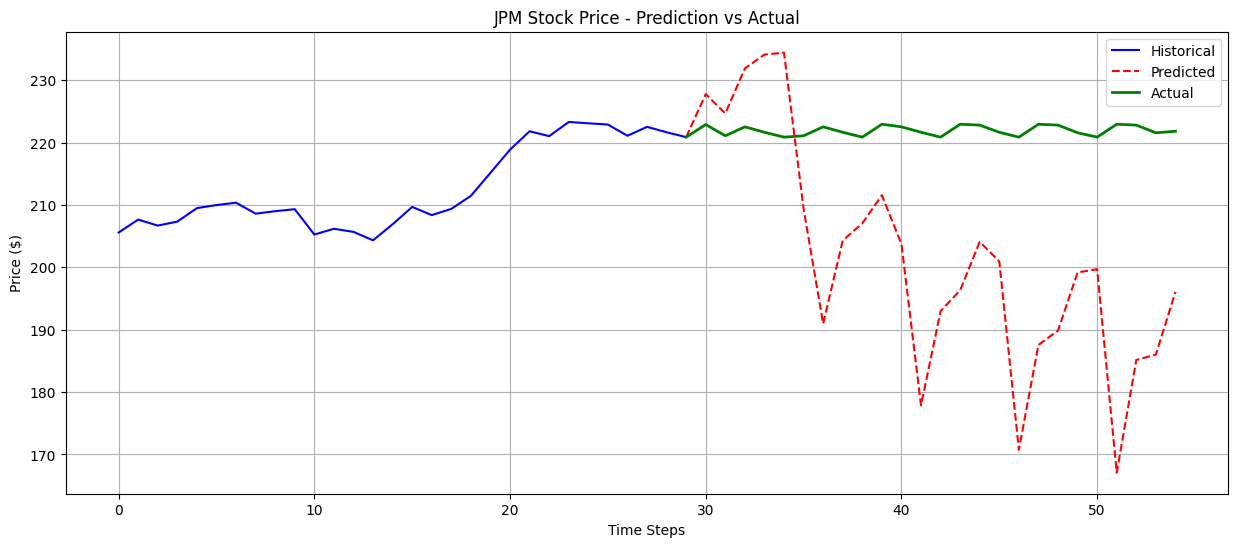


Predicting future prices for V...

V - Next 5 days price predictions:
Day 1: $284.27
Day 2: $277.66
Day 3: $285.54
Day 4: $284.58
Day 5: $287.00
Day 6: $266.14
Day 7: $246.77
Day 8: $255.94
Day 9: $257.22
Day 10: $260.94
Day 11: $258.51
Day 12: $233.46
Day 13: $242.76
Day 14: $243.60
Day 15: $250.28
Day 16: $253.95
Day 17: $225.06
Day 18: $235.41
Day 19: $234.40
Day 20: $242.85
Day 21: $251.17
Day 22: $219.65
Day 23: $231.23
Day 24: $228.02
Day 25: $237.74

V - Actual prices for comparison:
Day 1: $286.33
Day 2: $283.53
Day 3: $283.53
Day 4: $281.73
Day 5: $280.78
Day 6: $283.53
Day 7: $283.53
Day 8: $281.73
Day 9: $280.78
Day 10: $281.53
Day 11: $283.53
Day 12: $281.73
Day 13: $280.78
Day 14: $281.53
Day 15: $281.35
Day 16: $281.73
Day 17: $280.78
Day 18: $281.53
Day 19: $281.35
Day 20: $288.33
Day 21: $280.78
Day 22: $281.53
Day 23: $281.35
Day 24: $288.33
Day 25: $289.62


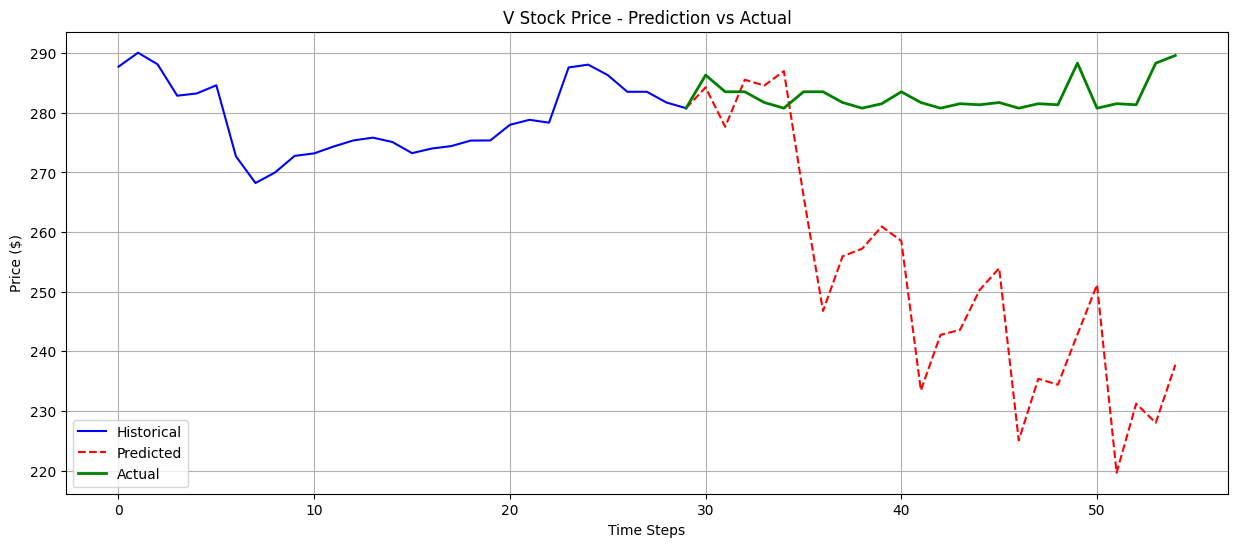


Predicting future prices for MA...

MA - Next 5 days price predictions:
Day 1: $501.43
Day 2: $498.76
Day 3: $498.27
Day 4: $500.39
Day 5: $490.98
Day 6: $460.99
Day 7: $443.93
Day 8: $442.67
Day 9: $446.26
Day 10: $417.73
Day 11: $437.75
Day 12: $414.07
Day 13: $412.34
Day 14: $411.87
Day 15: $391.62
Day 16: $420.70
Day 17: $391.85
Day 18: $391.44
Day 19: $385.82
Day 20: $372.40
Day 21: $407.33
Day 22: $374.32
Day 23: $375.74
Day 24: $364.75
Day 25: $357.97

MA - Actual prices for comparison:
Day 1: $513.94
Day 2: $510.50
Day 3: $511.90
Day 4: $509.46
Day 5: $505.62
Day 6: $510.50
Day 7: $511.90
Day 8: $509.46
Day 9: $505.62
Day 10: $506.14
Day 11: $511.90
Day 12: $509.46
Day 13: $505.62
Day 14: $506.14
Day 15: $505.70
Day 16: $509.46
Day 17: $505.62
Day 18: $506.14
Day 19: $505.70
Day 20: $507.00
Day 21: $505.62
Day 22: $506.14
Day 23: $505.70
Day 24: $507.00
Day 25: $499.03


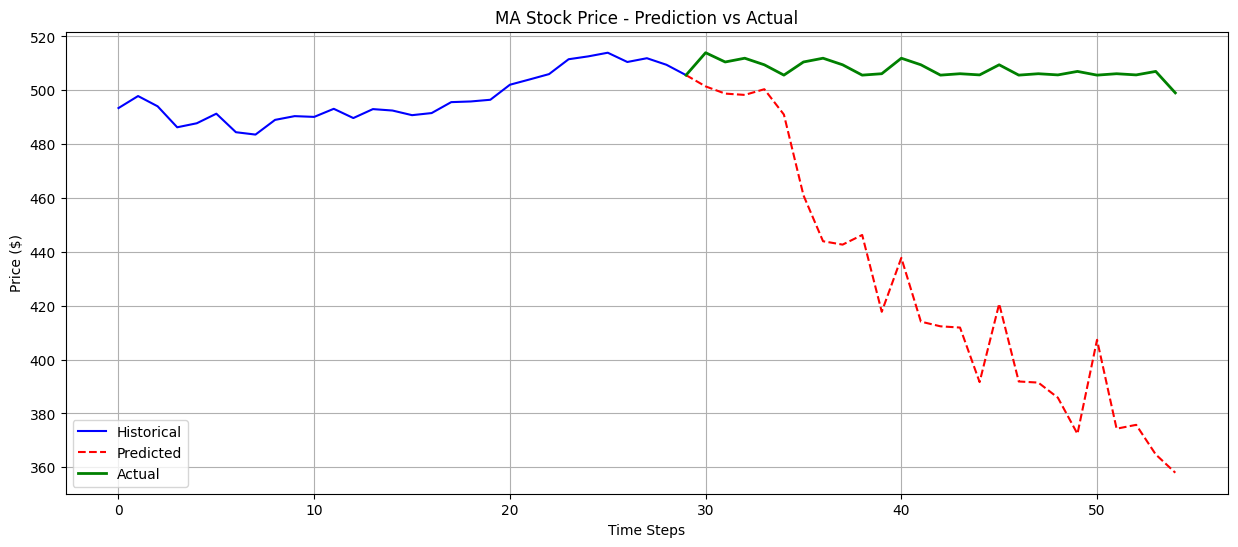


Predicting future prices for MSTR...

MSTR - Next 5 days price predictions:
Day 1: $228.24
Day 2: $216.07
Day 3: $230.14
Day 4: $220.37
Day 5: $224.08
Day 6: $208.77
Day 7: $181.60
Day 8: $202.69
Day 9: $196.00
Day 10: $206.05
Day 11: $204.13
Day 12: $169.13
Day 13: $191.70
Day 14: $187.28
Day 15: $200.72
Day 16: $202.39
Day 17: $163.55
Day 18: $187.16
Day 19: $182.89
Day 20: $197.53
Day 21: $202.09
Day 22: $161.69
Day 23: $185.77
Day 24: $181.03
Day 25: $195.82

MSTR - Actual prices for comparison:
Day 1: $208.45
Day 2: $212.08
Day 3: $204.91
Day 4: $218.25
Day 5: $227.75
Day 6: $212.08
Day 7: $204.91
Day 8: $218.25
Day 9: $227.75
Day 10: $242.77
Day 11: $204.91
Day 12: $218.25
Day 13: $227.75
Day 14: $242.77
Day 15: $251.24
Day 16: $218.25
Day 17: $227.75
Day 18: $242.77
Day 19: $251.24
Day 20: $239.00
Day 21: $227.75
Day 22: $242.77
Day 23: $251.24
Day 24: $239.00
Day 25: $237.00


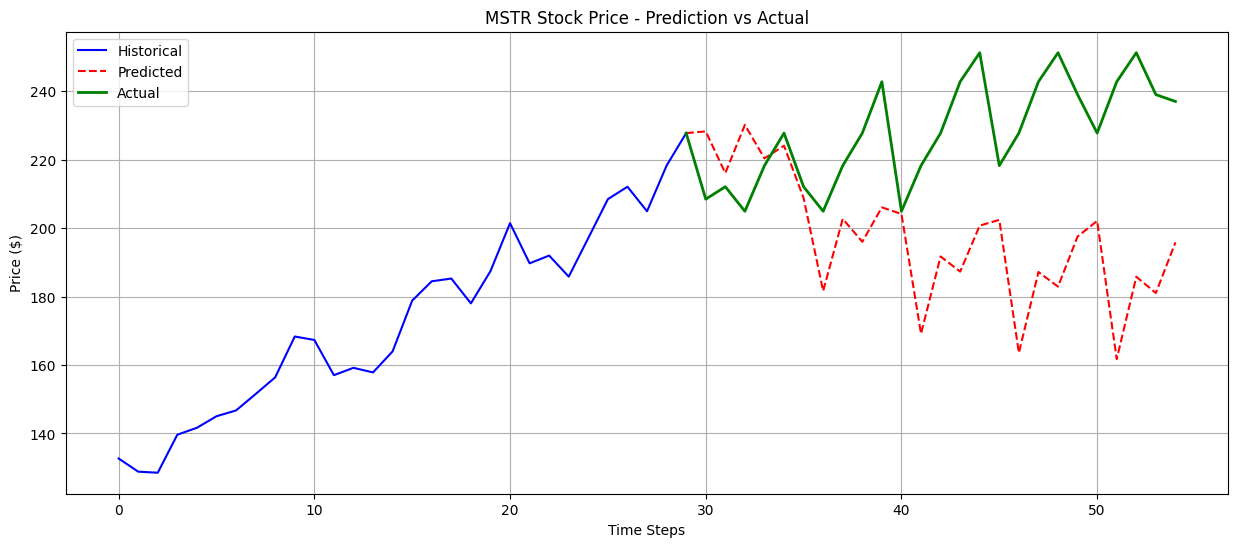


Predicting future prices for DIS...

DIS - Next 5 days price predictions:
Day 1: $95.86
Day 2: $94.30
Day 3: $102.77
Day 4: $103.08
Day 5: $102.05
Day 6: $88.44
Day 7: $72.20
Day 8: $88.97
Day 9: $91.92
Day 10: $98.44
Day 11: $86.85
Day 12: $62.72
Day 13: $83.50
Day 14: $88.46
Day 15: $98.31
Day 16: $86.58
Day 17: $58.07
Day 18: $81.87
Day 19: $87.71
Day 20: $98.90
Day 21: $87.09
Day 22: $56.25
Day 23: $82.17
Day 24: $88.59
Day 25: $99.86

DIS - Actual prices for comparison:
Day 1: $95.95
Day 2: $96.20
Day 3: $95.99
Day 4: $95.25
Day 5: $95.01
Day 6: $96.20
Day 7: $95.99
Day 8: $95.25
Day 9: $95.01
Day 10: $95.21
Day 11: $95.99
Day 12: $95.25
Day 13: $95.01
Day 14: $95.21
Day 15: $95.68
Day 16: $95.25
Day 17: $95.01
Day 18: $95.21
Day 19: $95.68
Day 20: $94.94
Day 21: $95.01
Day 22: $95.21
Day 23: $95.68
Day 24: $94.94
Day 25: $95.00


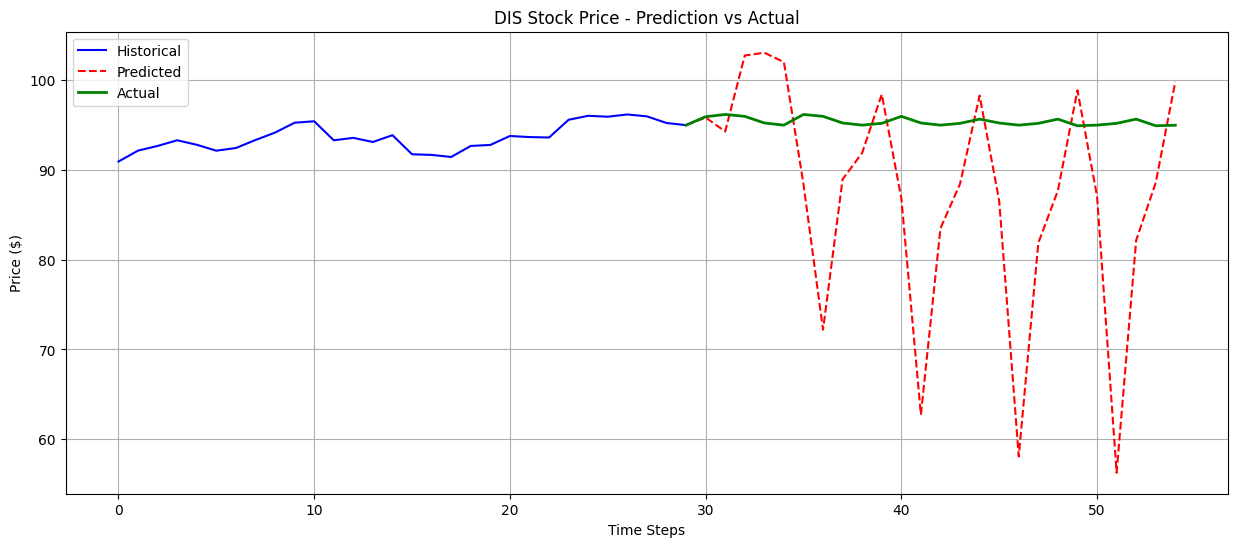


Predicting future prices for BA...

BA - Next 5 days price predictions:
Day 1: $156.81
Day 2: $153.50
Day 3: $161.66
Day 4: $162.28
Day 5: $162.37
Day 6: $147.04
Day 7: $131.39
Day 8: $144.53
Day 9: $148.00
Day 10: $155.03
Day 11: $144.06
Day 12: $122.21
Day 13: $137.65
Day 14: $142.51
Day 15: $152.02
Day 16: $142.72
Day 17: $117.08
Day 18: $134.64
Day 19: $139.72
Day 20: $150.12
Day 21: $142.37
Day 22: $114.42
Day 23: $133.71
Day 24: $138.69
Day 25: $149.01

BA - Actual prices for comparison:
Day 1: $158.36
Day 2: $158.37
Day 3: $153.53
Day 4: $151.98
Day 5: $154.52
Day 6: $158.37
Day 7: $153.53
Day 8: $151.98
Day 9: $154.52
Day 10: $150.61
Day 11: $153.53
Day 12: $151.98
Day 13: $154.52
Day 14: $150.61
Day 15: $147.58
Day 16: $151.98
Day 17: $154.52
Day 18: $150.61
Day 19: $147.58
Day 20: $152.51
Day 21: $154.52
Day 22: $150.61
Day 23: $147.58
Day 24: $152.51
Day 25: $147.88


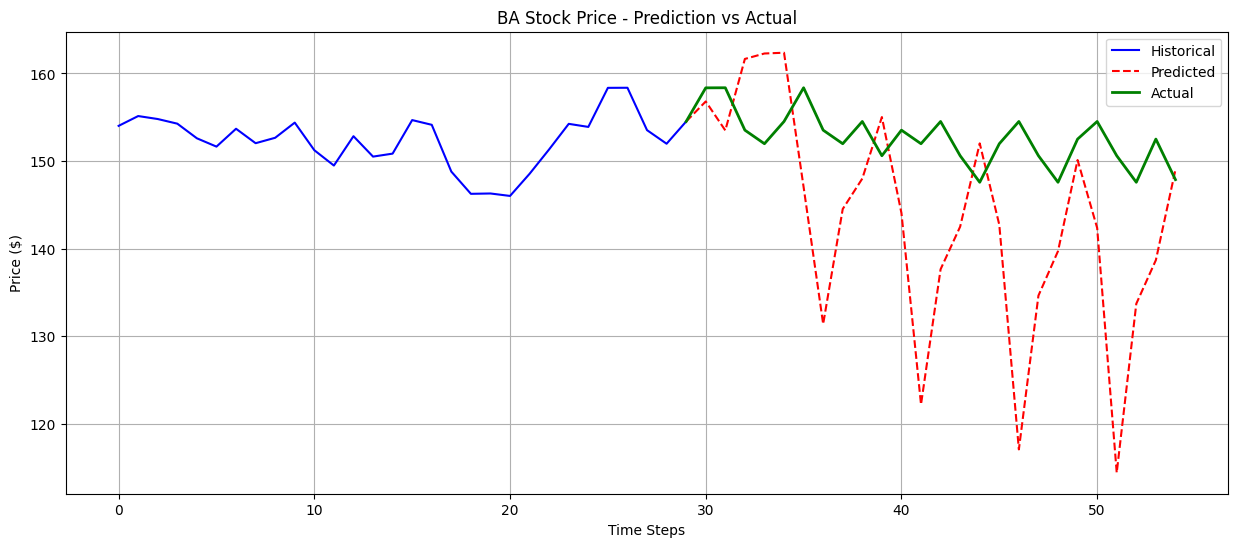


Predicting future prices for XOM...

XOM - Next 5 days price predictions:
Day 1: $119.49
Day 2: $117.89
Day 3: $125.82
Day 4: $125.89
Day 5: $125.38
Day 6: $111.66
Day 7: $97.38
Day 8: $112.32
Day 9: $115.38
Day 10: $122.37
Day 11: $109.55
Day 12: $87.80
Day 13: $106.12
Day 14: $109.92
Day 15: $120.50
Day 16: $108.94
Day 17: $82.65
Day 18: $103.69
Day 19: $108.01
Day 20: $119.68
Day 21: $109.24
Day 22: $80.28
Day 23: $103.33
Day 24: $108.19
Day 25: $119.58

XOM - Actual prices for comparison:
Day 1: $119.72
Day 2: $119.94
Day 3: $119.40
Day 4: $119.13
Day 5: $119.32
Day 6: $119.94
Day 7: $119.40
Day 8: $119.13
Day 9: $119.32
Day 10: $116.77
Day 11: $119.40
Day 12: $119.13
Day 13: $119.32
Day 14: $116.77
Day 15: $117.07
Day 16: $119.13
Day 17: $119.32
Day 18: $116.77
Day 19: $117.07
Day 20: $116.48
Day 21: $119.32
Day 22: $116.77
Day 23: $117.07
Day 24: $116.48
Day 25: $116.68


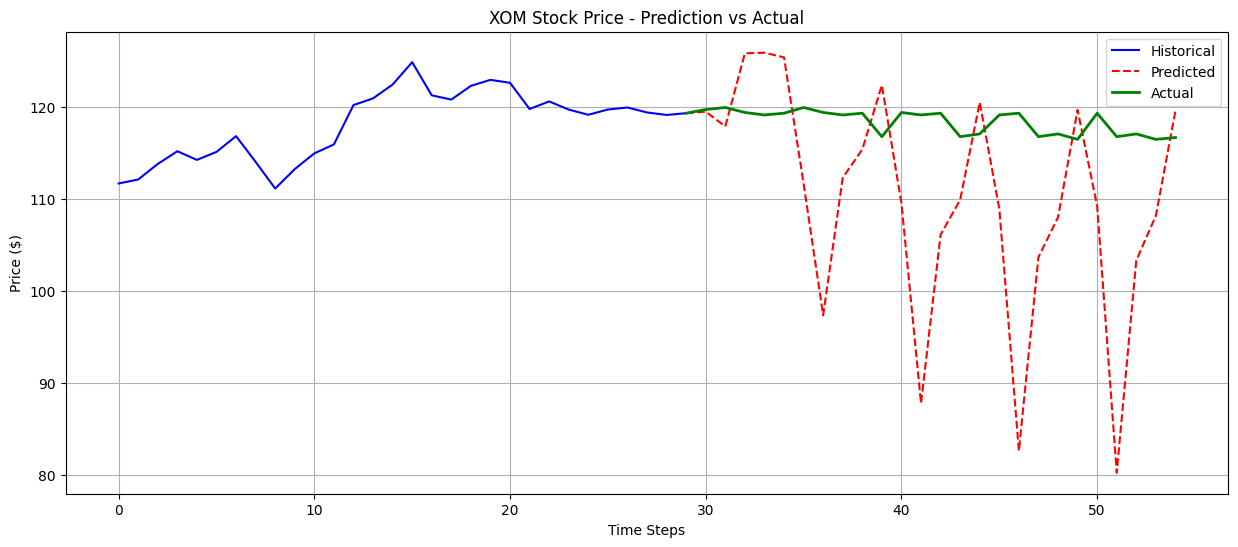


Predicting future prices for ORCL...

ORCL - Next 5 days price predictions:
Day 1: $176.68
Day 2: $172.29
Day 3: $182.83
Day 4: $181.91
Day 5: $183.01
Day 6: $163.35
Day 7: $145.06
Day 8: $161.91
Day 9: $163.61
Day 10: $170.25
Day 11: $159.26
Day 12: $133.72
Day 13: $152.68
Day 14: $155.68
Day 15: $165.24
Day 16: $157.52
Day 17: $127.80
Day 18: $148.50
Day 19: $151.50
Day 20: $162.15
Day 21: $157.10
Day 22: $125.10
Day 23: $147.00
Day 24: $149.67
Day 25: $160.45

ORCL - Actual prices for comparison:
Day 1: $173.16
Day 2: $174.28
Day 3: $173.01
Day 4: $172.91
Day 5: $173.10
Day 6: $174.28
Day 7: $173.01
Day 8: $172.91
Day 9: $173.10
Day 10: $172.14
Day 11: $173.01
Day 12: $172.91
Day 13: $173.10
Day 14: $172.14
Day 15: $172.29
Day 16: $172.91
Day 17: $173.10
Day 18: $172.14
Day 19: $172.29
Day 20: $172.79
Day 21: $173.10
Day 22: $172.14
Day 23: $172.29
Day 24: $172.79
Day 25: $167.40


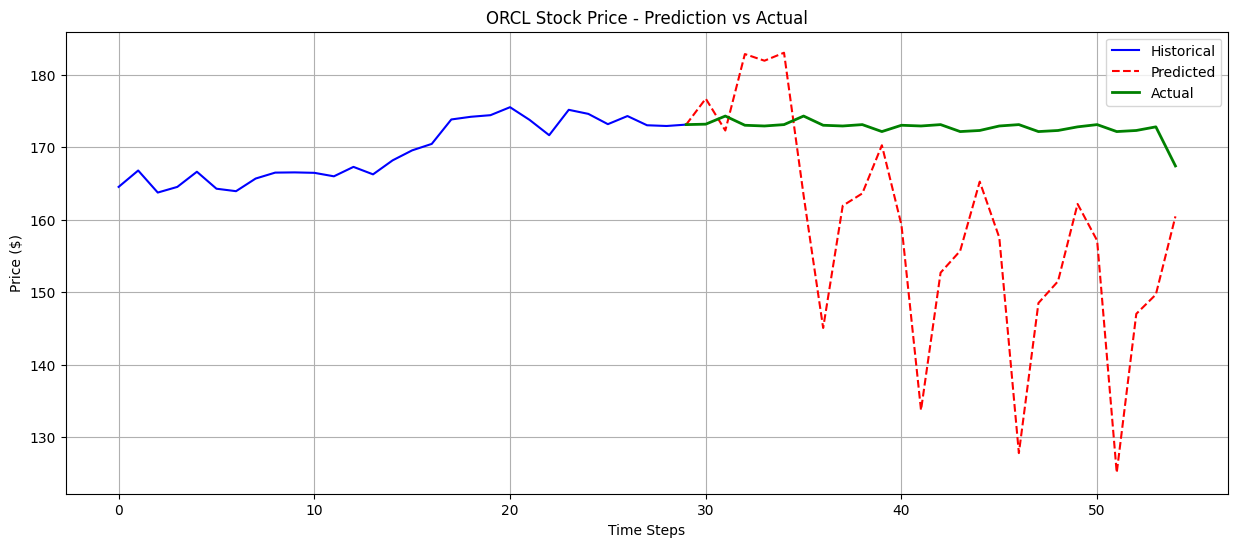


Predicting future prices for META...

META - Next 5 days price predictions:
Day 1: $554.26
Day 2: $548.27
Day 3: $545.43
Day 4: $538.88
Day 5: $533.55
Day 6: $521.20
Day 7: $501.39
Day 8: $498.12
Day 9: $500.86
Day 10: $462.28
Day 11: $495.09
Day 12: $471.32
Day 13: $468.70
Day 14: $465.95
Day 15: $434.27
Day 16: $473.66
Day 17: $445.67
Day 18: $444.69
Day 19: $436.73
Day 20: $412.19
Day 21: $455.77
Day 22: $423.84
Day 23: $424.54
Day 24: $411.47
Day 25: $394.69

META - Actual prices for comparison:
Day 1: $569.11
Day 2: $572.12
Day 3: $562.50
Day 4: $561.52
Day 5: $571.72
Day 6: $572.12
Day 7: $562.50
Day 8: $561.52
Day 9: $571.72
Day 10: $574.12
Day 11: $562.50
Day 12: $561.52
Day 13: $571.72
Day 14: $574.12
Day 15: $575.40
Day 16: $561.52
Day 17: $571.72
Day 18: $574.12
Day 19: $575.40
Day 20: $589.38
Day 21: $571.72
Day 22: $574.12
Day 23: $575.40
Day 24: $589.38
Day 25: $563.01


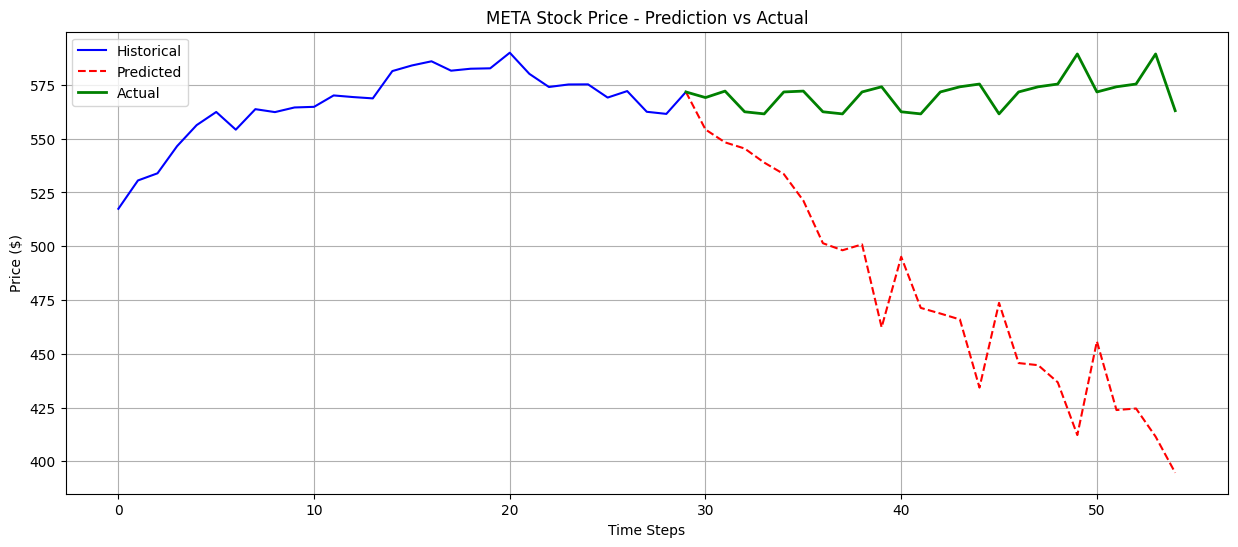

time: 17.7 s (started: 2024-11-17 16:57:40 +00:00)


In [18]:
def inverse_transform_price(scaled_data, scaler):
    """
    Convert scaled prices back to actual prices
    """
    # Create a dummy array with zeros for all features
    dummy = np.zeros((len(scaled_data), scaler.scale_.shape[0]))
    # Put the scaled prices in the correct column (assuming close price is column 3)
    dummy[:, 3] = scaled_data
    # Inverse transform
    inverse_transformed = scaler.inverse_transform(dummy)
    # Return only the close price column
    return inverse_transformed[:, 3]

def evaluate_predictions(y_true, y_pred, ticker, scaler):
    """
    Calculate and print evaluation metrics for the predictions
    """
    # Convert scaled values back to actual prices
    y_true_actual = inverse_transform_price(y_true, scaler)
    y_pred_actual = inverse_transform_price(y_pred, scaler)
    
    # Calculate metrics on actual prices
    mse = mean_squared_error(y_true_actual, y_pred_actual)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true_actual, y_pred_actual)
    
    print(f"\nEvaluation Metrics for {ticker}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae: .4f}")
    
    return mse, rmse, mae

def plot_predictions(actual_values, predicted_values, ticker, scaler):
    """
    Plot actual vs predicted values in actual prices
    """
    plt.figure(figsize=(15, 6))
    
    # Convert to actual prices
    actual_prices = inverse_transform_price(actual_values, scaler)
    predicted_prices = inverse_transform_price(predicted_values, scaler)
    
    # Create time axis for plotting
    time_steps = range(len(actual_prices))
    
    # Plot
    plt.plot(time_steps, actual_prices, label='Actual', color='blue')
    plt.plot(time_steps, predicted_prices, label='Predicted', color='red', linestyle='--')
    
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Time Steps')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Make predictions for each stock
predictions_dict = {}
metrics_dict = {}

# Test set predictions and evaluation
for i, ticker in enumerate(tickers):
    print(f"\nAnalyzing {ticker}...")
    
    # Get predictions for test set
    test_predictions = model.predict(test_X_list[i], verbose=0)
    
    # Store predictions
    predictions_dict[ticker] = {'actual': test_y_list[i],'predicted': test_predictions}
    
    # Calculate metrics
    mse, rmse, mae = evaluate_predictions(test_y_list[i][:, 0], test_predictions[:, 0], ticker, global_scaler)
    metrics_dict[ticker] = {'MSE': mse,'RMSE': rmse, 'MAE': mae}
    
    # Plot test predictions
    plot_predictions(
        test_y_list[i][:, 0], 
        test_predictions[:, 0], 
        ticker,
        global_scaler
    )

# Create a summary DataFrame of metrics
metrics_df = pd.DataFrame(metrics_dict).T
print("\nSummary of Metrics for All Stocks:")
print(metrics_df)

In [ ]:
def plot_future_predictions(historical_data, future_preds, actual_prices, ticker, scaler):
    """
    Plot historical data, future predictions, and actual prices in different colors
    
    Parameters:
    - historical_data: Historical price data
    - future_preds: Model's price predictions
    - actual_prices: Actual prices for the prediction period
    - ticker: Stock ticker symbol
    - scaler: The scaler used to transform the data
    """
    plt.figure(figsize=(15, 6))
    
    # Convert to actual prices
    historical_prices = inverse_transform_price(historical_data, scaler)
    future_prices = inverse_transform_price(future_preds.flatten(), scaler)
    actual_future_prices = inverse_transform_price(actual_prices.flatten(), scaler)
    
    # Plot historical data
    plt.plot(range(len(historical_prices)), historical_prices, label='Historical', color='blue')
    
    # Plot predictions
    connection_indices = range(len(historical_prices)-1, len(historical_prices) + len(future_prices))
    connection_points = np.concatenate([historical_prices[-1:], future_prices])
    plt.plot(connection_indices, connection_points, label='Predicted', color='red', linestyle='--')
    
    # Plot actual future prices (starting from the last historical point)
    actual_indices = range(len(historical_prices)-1, len(historical_prices) + len(actual_future_prices))
    actual_points = np.concatenate([historical_prices[-1:], actual_future_prices])
    plt.plot(actual_indices, actual_points, label='Actual', color='green', linewidth=2)
    
    plt.title(f'{ticker} Stock Price - Prediction vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()


def predict_future(model, last_sequence, n_steps_out, n_features):
    """
    Make future predictions using the last known sequence
    
    Args:
        model: trained LSTM model
        last_sequence: last known sequence of data (shape: [n_steps_in, n_features])
        n_steps_out: number of future steps to predict
        n_features: number of features in the input data
    """
    future_predictions = []
    current_sequence = last_sequence.reshape(1, n_steps_in, n_features)
    
    for _ in range(n_steps_out):
        # Get prediction for next step
        next_pred = model.predict(current_sequence, verbose=0)
        future_predictions.append(next_pred[0])
        
        # Update the sequence by removing the first timestep and adding the prediction
        # We'll repeat the last prediction across all features as an approximation
        new_row = np.repeat(next_pred[0][0], n_features).reshape(1, 1, n_features)
        current_sequence = np.concatenate([current_sequence[:, 1:, :], new_row], axis=1)
    
    return np.array(future_predictions)

# Future predictions
print("\nMaking Future Predictions...")
n_features = train_X.shape[2]

for i, ticker in enumerate(tickers):
    print(f"\nPredicting future prices for {ticker}...")
    
    # Get the last sequence from the test data
    last_sequence = test_X_list[i][-1]
    
    # Make future predictions
    future_preds = predict_future(model, last_sequence, n_steps_out, n_features)
    
    # Get recent historical data for plotting (last 30 days)
    historical_data = test_y_list[i][-30:, 0]
    
    # Get actual future prices for comparison (next n_steps_out days)
    actual_future_prices = test_y_list[i][-n_steps_out:]
    
    # Print actual price predictions
    future_prices = inverse_transform_price(future_preds.flatten(), global_scaler)
    print(f"\n{ticker} - Next {n_steps_out} days price predictions:")
    for day, price in enumerate(future_prices, 1):
        print(f"Day {day}: ${price:.2f}")
        
    # Print actual prices for comparison
    actual_prices = inverse_transform_price(actual_future_prices.flatten(), global_scaler)
    print(f"\n{ticker} - Actual prices for comparison:")
    for day, price in enumerate(actual_prices, 1):
        print(f"Day {day}: ${price:.2f}")
        
    # Plot future predictions with historical context and actual prices
    try:
        plot_future_predictions(historical_data,future_preds,actual_future_prices,ticker,global_scaler)
    except Exception as e:
        print(f"Error plotting predictions for {ticker}: {e}")
        continue
